In [1]:
import geopandas as gpd
import pandas as pd
import os

dir = os.getcwd()
path = os.chdir(dir)  # Assume current path is "../prek_viz/primary_data"

In [3]:
# load the shapefile
# Prior attempt: geo_usa = geopandas.read_file(path+'cb_2018_us_state_20m')
geo_usa = gpd.read_file(path + "/tl_2020_us_state")
geo_usa.head()

REGION DIVISION STATEFP   STATENS GEOID STUSPS           NAME LSAD  MTFCC  \
0      3        5      54  01779805    54     WV  West Virginia   00  G4000   
1      3        5      12  00294478    12     FL        Florida   00  G4000   
2      2        3      17  01779784    17     IL       Illinois   00  G4000   
3      2        4      27  00662849    27     MN      Minnesota   00  G4000   
4      3        5      24  01714934    24     MD       Maryland   00  G4000   

  FUNCSTAT         ALAND       AWATER     INTPTLAT      INTPTLON  \
0        A   62266296765    489206049  +38.6472854  -080.6183274   
1        A  138958484319  45975808217  +28.3989775  -082.5143005   
2        A  143778461053   6216594318  +40.1028754  -089.1526108   
3        A  206232157570  18949864226  +46.3159573  -094.1996043   
4        A   25151895765   6979171386  +38.9466584  -076.6744939   

                                            geometry  
0  POLYGON ((-81.74725 39.09538, -81.74635 39.096...  
1  MULTIPOLYGON (((-86.39964 30.22696, -86.40262 ...  
2  POLYGON ((-91.18529 40.63780, -91.17510 40.643...  
3  POLYGON ((-96.78438 46.63050, -96.78434 46.630...  
4  POLYGON ((-77.45881 39.22027, -77.45866 39.220...

In [4]:
preschool = pd.read_csv("preschool_assessment.csv", keep_default_na=False)
preschool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   State                      714 non-null    object
 1   RequiredAssessmentforpreK  714 non-null    object
 2   Year                       714 non-null    int64 
 3   state_abbrev               714 non-null    object
 4   state_fips                 714 non-null    int64 
 5   _merge                     714 non-null    object
dtypes: int64(2), object(4)
memory usage: 33.6+ KB


In [5]:
preschool = pd.read_csv("preschool_assessment.csv", keep_default_na=False)
preschool.rename(columns={"state_abbrev": "STUSPS"}, inplace=True)
preschool.drop("_merge", axis=1, inplace=True)
preschool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   State                      714 non-null    object
 1   RequiredAssessmentforpreK  714 non-null    object
 2   Year                       714 non-null    int64 
 3   STUSPS                     714 non-null    object
 4   state_fips                 714 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 28.0+ KB


In [6]:
# merge usa_state data and geo_usa shapefile
geo_merge = preschool.merge(geo_usa, on="STUSPS", how="inner")
geo_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   State                      714 non-null    object  
 1   RequiredAssessmentforpreK  714 non-null    object  
 2   Year                       714 non-null    int64   
 3   STUSPS                     714 non-null    object  
 4   state_fips                 714 non-null    int64   
 5   REGION                     714 non-null    object  
 6   DIVISION                   714 non-null    object  
 7   STATEFP                    714 non-null    object  
 8   STATENS                    714 non-null    object  
 9   GEOID                      714 non-null    object  
 10  NAME                       714 non-null    object  
 11  LSAD                       714 non-null    object  
 12  MTFCC                      714 non-null    object  
 13  FUNCSTAT                   714 non-

In [8]:
# geo_merge.drop(columns=['STATEFP', 'NAME'], inplace=True)
geo_merge.head()
geo_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   State                      714 non-null    object  
 1   RequiredAssessmentforpreK  714 non-null    object  
 2   Year                       714 non-null    int64   
 3   STUSPS                     714 non-null    object  
 4   state_fips                 714 non-null    int64   
 5   REGION                     714 non-null    object  
 6   DIVISION                   714 non-null    object  
 7   STATEFP                    714 non-null    object  
 8   STATENS                    714 non-null    object  
 9   GEOID                      714 non-null    object  
 10  NAME                       714 non-null    object  
 11  LSAD                       714 non-null    object  
 12  MTFCC                      714 non-null    object  
 13  FUNCSTAT                   714 non-

In [74]:
# Now convert the 'Year' column to datetime format with January 1st as the default date
geo_merge["Year"] = pd.to_datetime(geo_merge["Year"], format="%Y")

In [75]:
geo_merge.head()

State                          RequiredAssessmentforpreK       Year  \
0  ALABAMA                               Multiple Assessments 2007-01-01   
1  ALABAMA  Required assessment instruments are determined... 2008-01-01   
2  ALABAMA                               Multiple Assessments 2009-01-01   
3  ALABAMA                               Multiple Assessments 2010-01-01   
4  ALABAMA                               Multiple Assessments 2011-01-01   

  STUSPS  state_fips REGION DIVISION STATEFP   STATENS GEOID     NAME LSAD  \
0     AL           1      3        6      01  01779775    01  Alabama   00   
1     AL           1      3        6      01  01779775    01  Alabama   00   
2     AL           1      3        6      01  01779775    01  Alabama   00   
3     AL           1      3        6      01  01779775    01  Alabama   00   
4     AL           1      3        6      01  01779775    01  Alabama   00   

   MTFCC FUNCSTAT         ALAND      AWATER     INTPTLAT      INTPTLON  \
0  G4000        A  131175460655  4591915034  +32.7396323  -086.8434593   
1  G4000        A  131175460655  4591915034  +32.7396323  -086.8434593   
2  G4000        A  131175460655  4591915034  +32.7396323  -086.8434593   
3  G4000        A  131175460655  4591915034  +32.7396323  -086.8434593   
4  G4000        A  131175460655  4591915034  +32.7396323  -086.8434593   

                                            geometry  
0  POLYGON ((-88.13999 34.58170, -88.13997 34.581...  
1  POLYGON ((-88.13999 34.58170, -88.13997 34.581...  
2  POLYGON ((-88.13999 34.58170, -88.13997 34.581...  
3  POLYGON ((-88.13999 34.58170, -88.13997 34.581...  
4  POLYGON ((-88.13999 34.58170, -88.13997 34.581...

In [76]:
geo_merge.to_csv("geospatial_preK_assessment.csv", index=False)

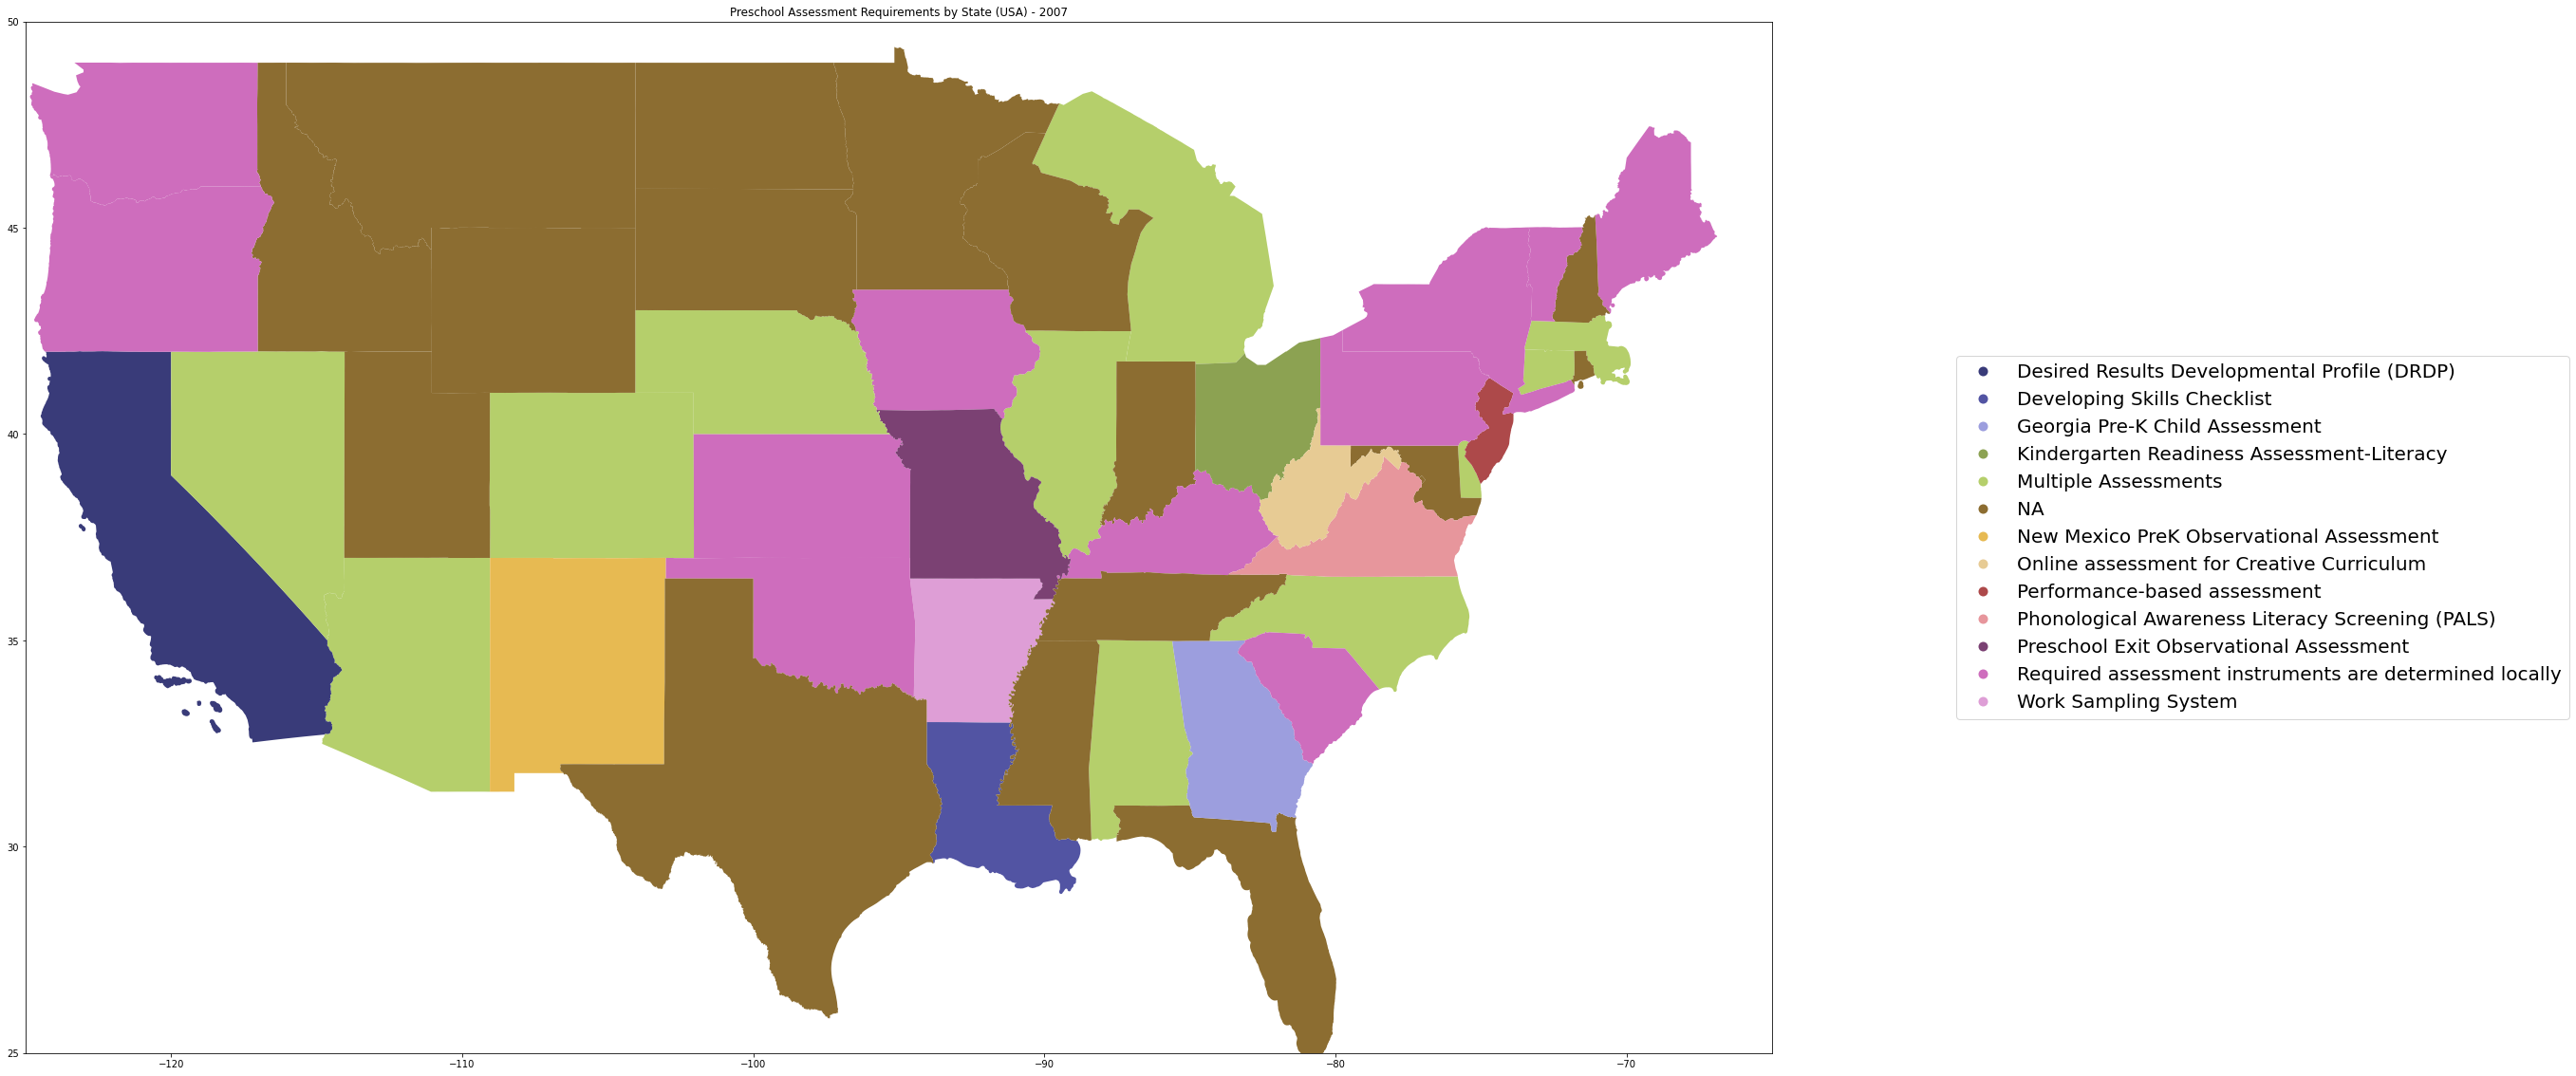

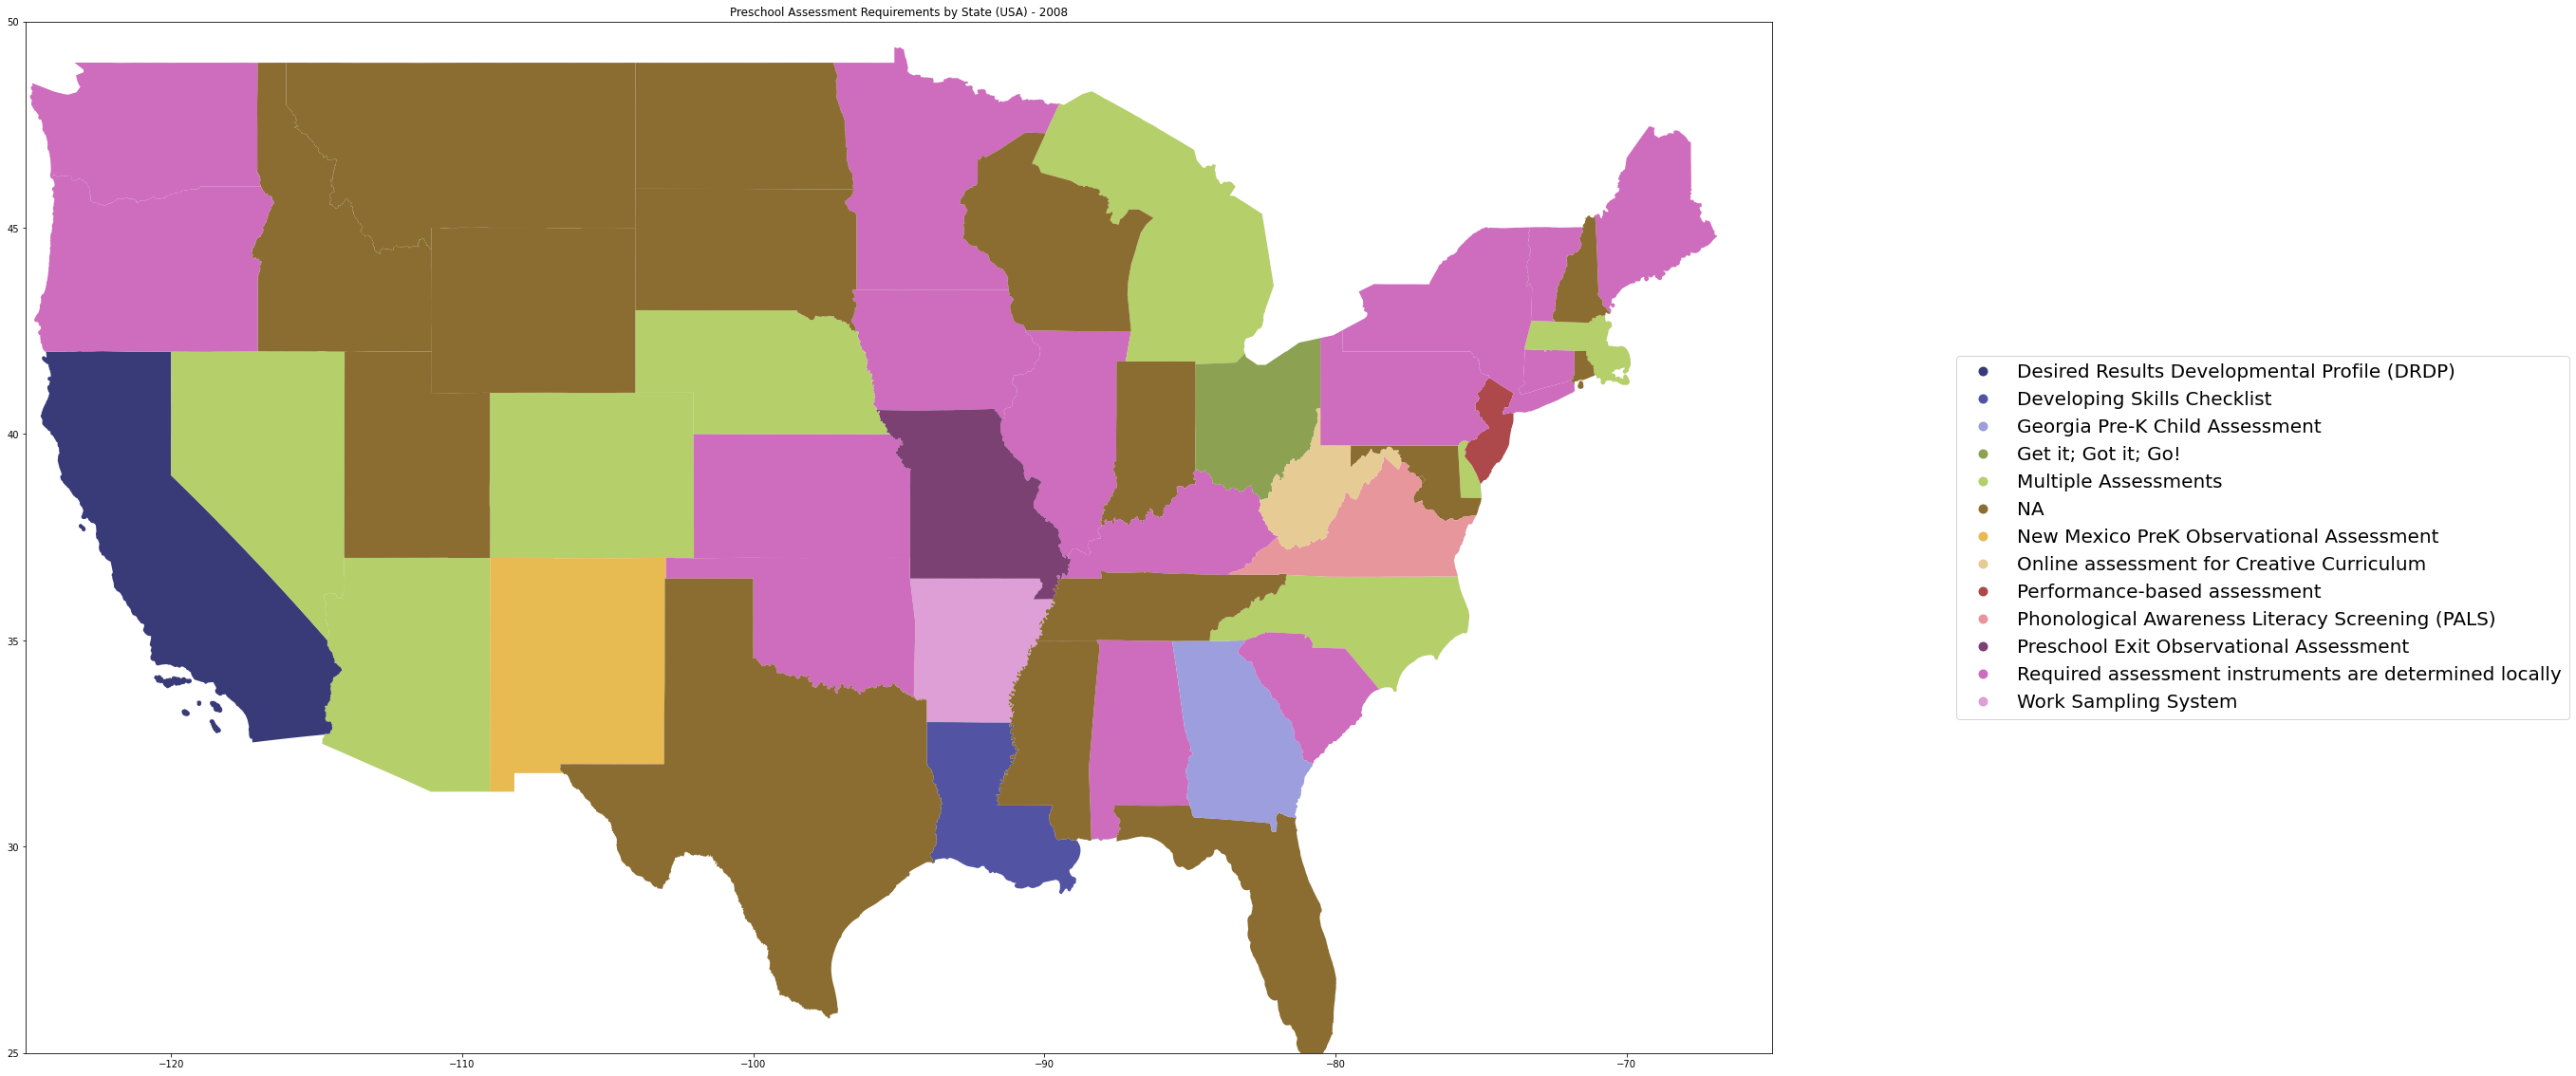

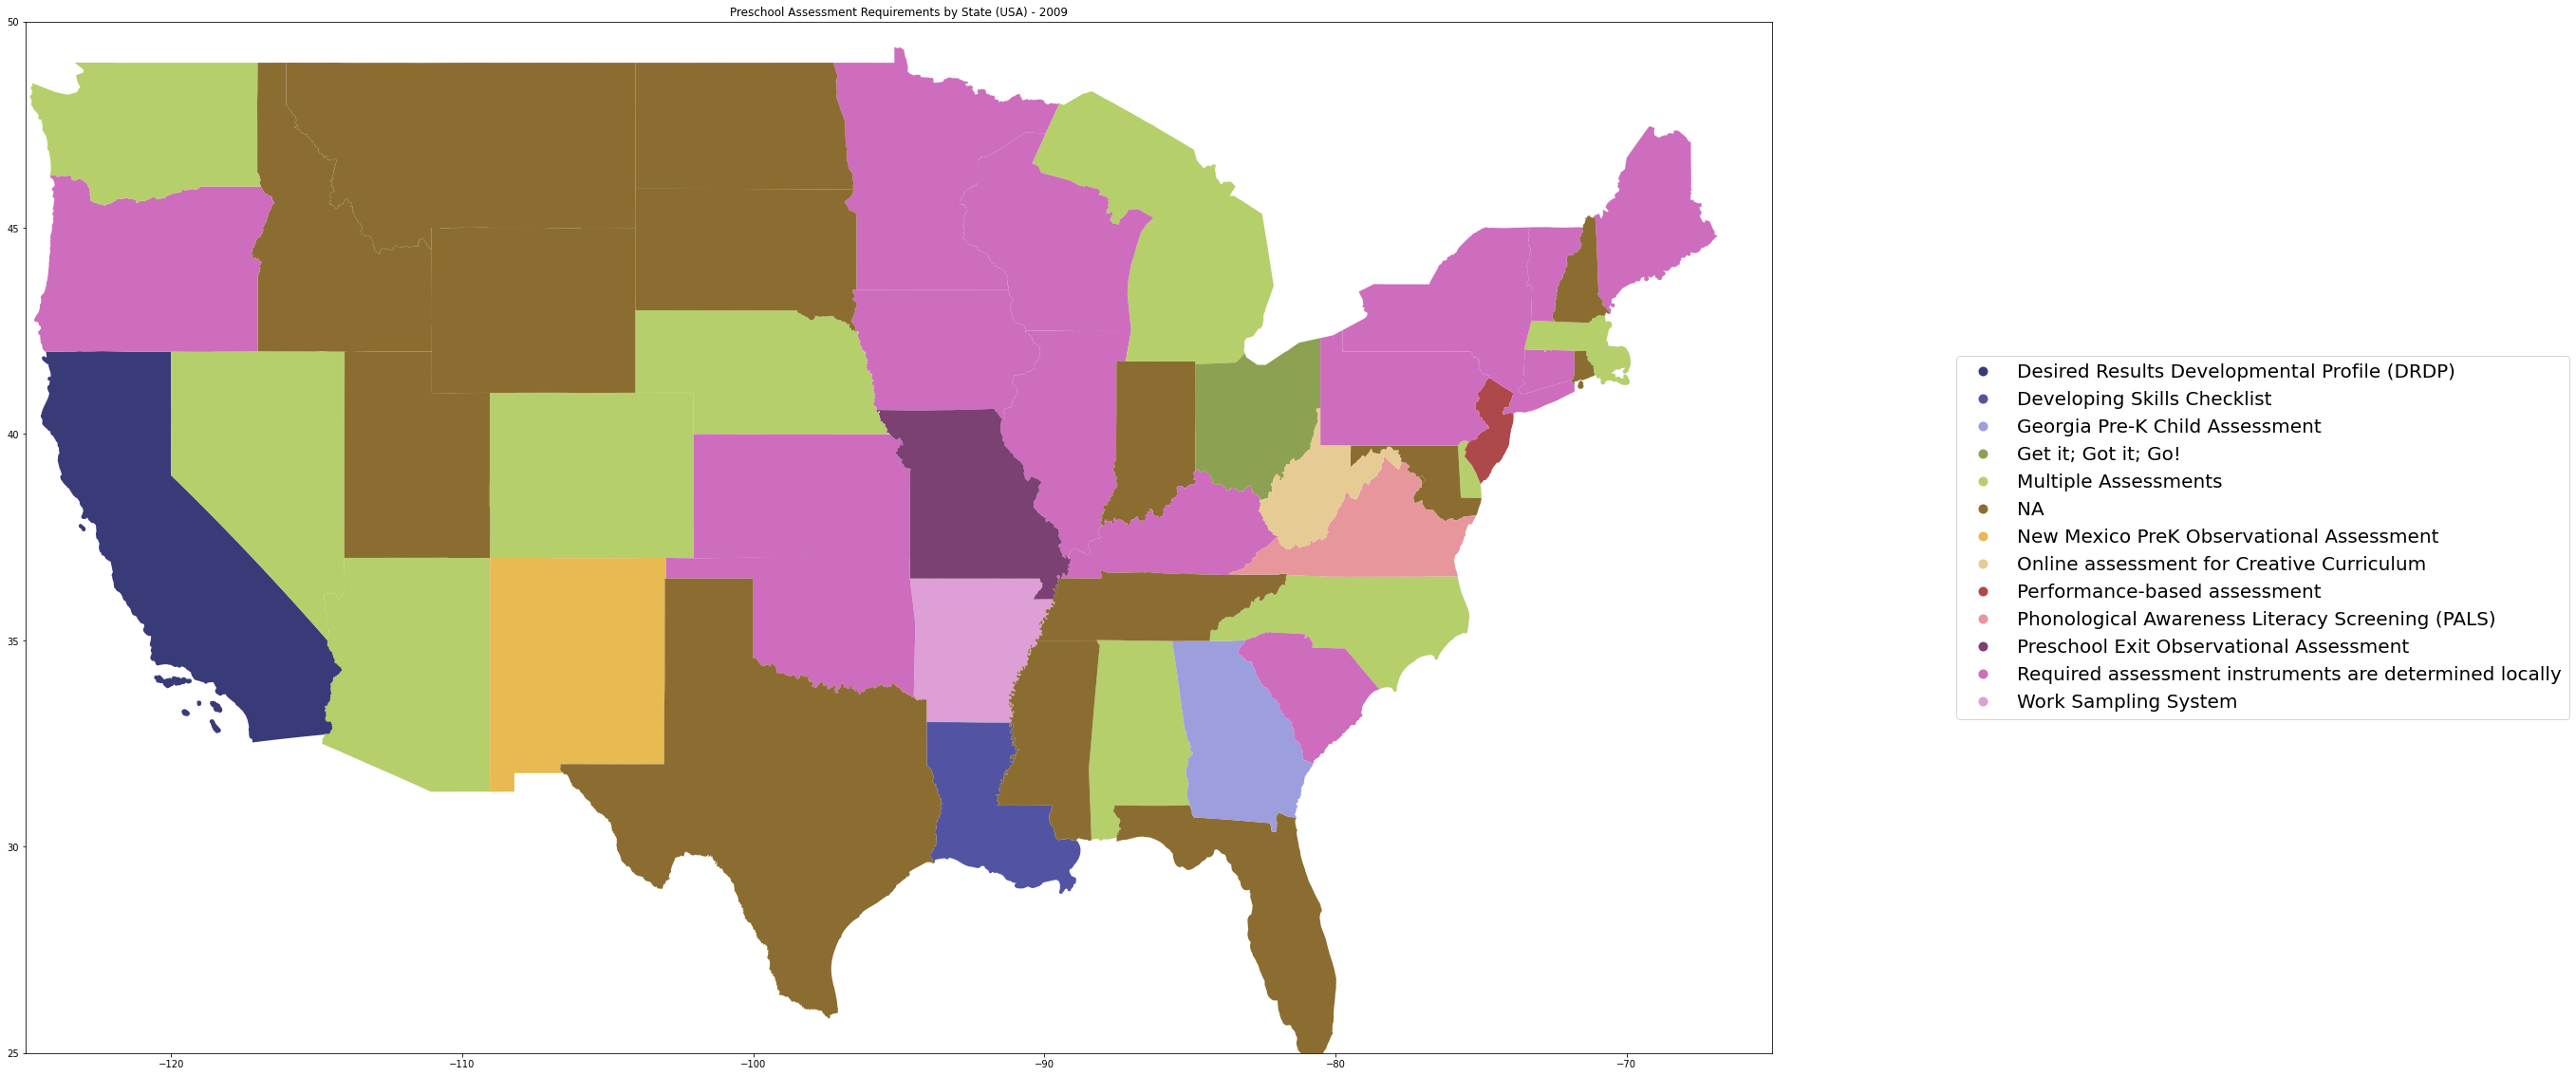

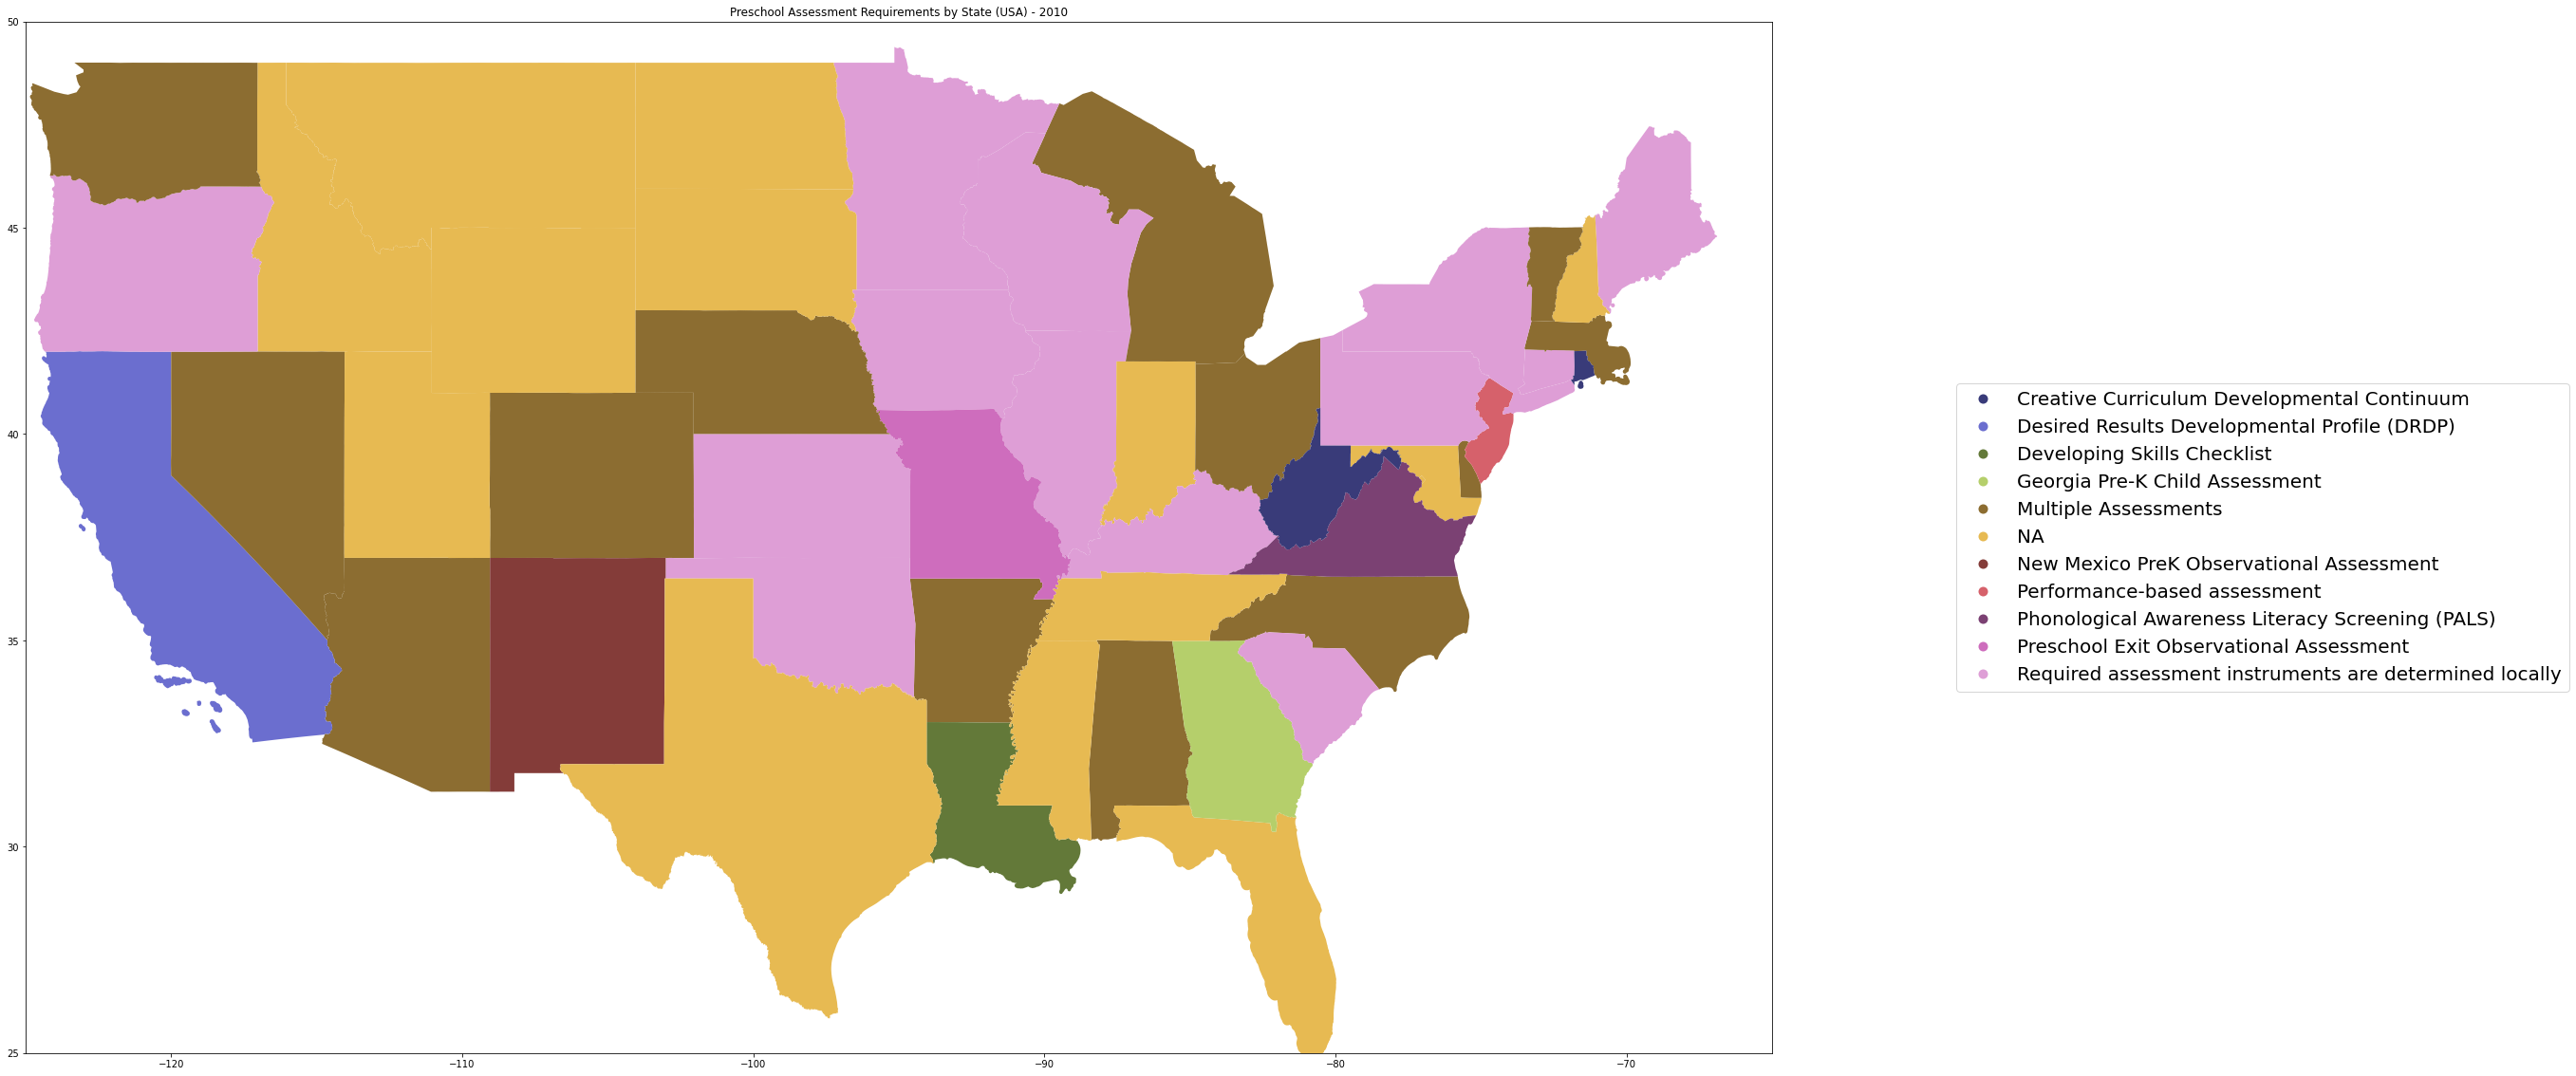

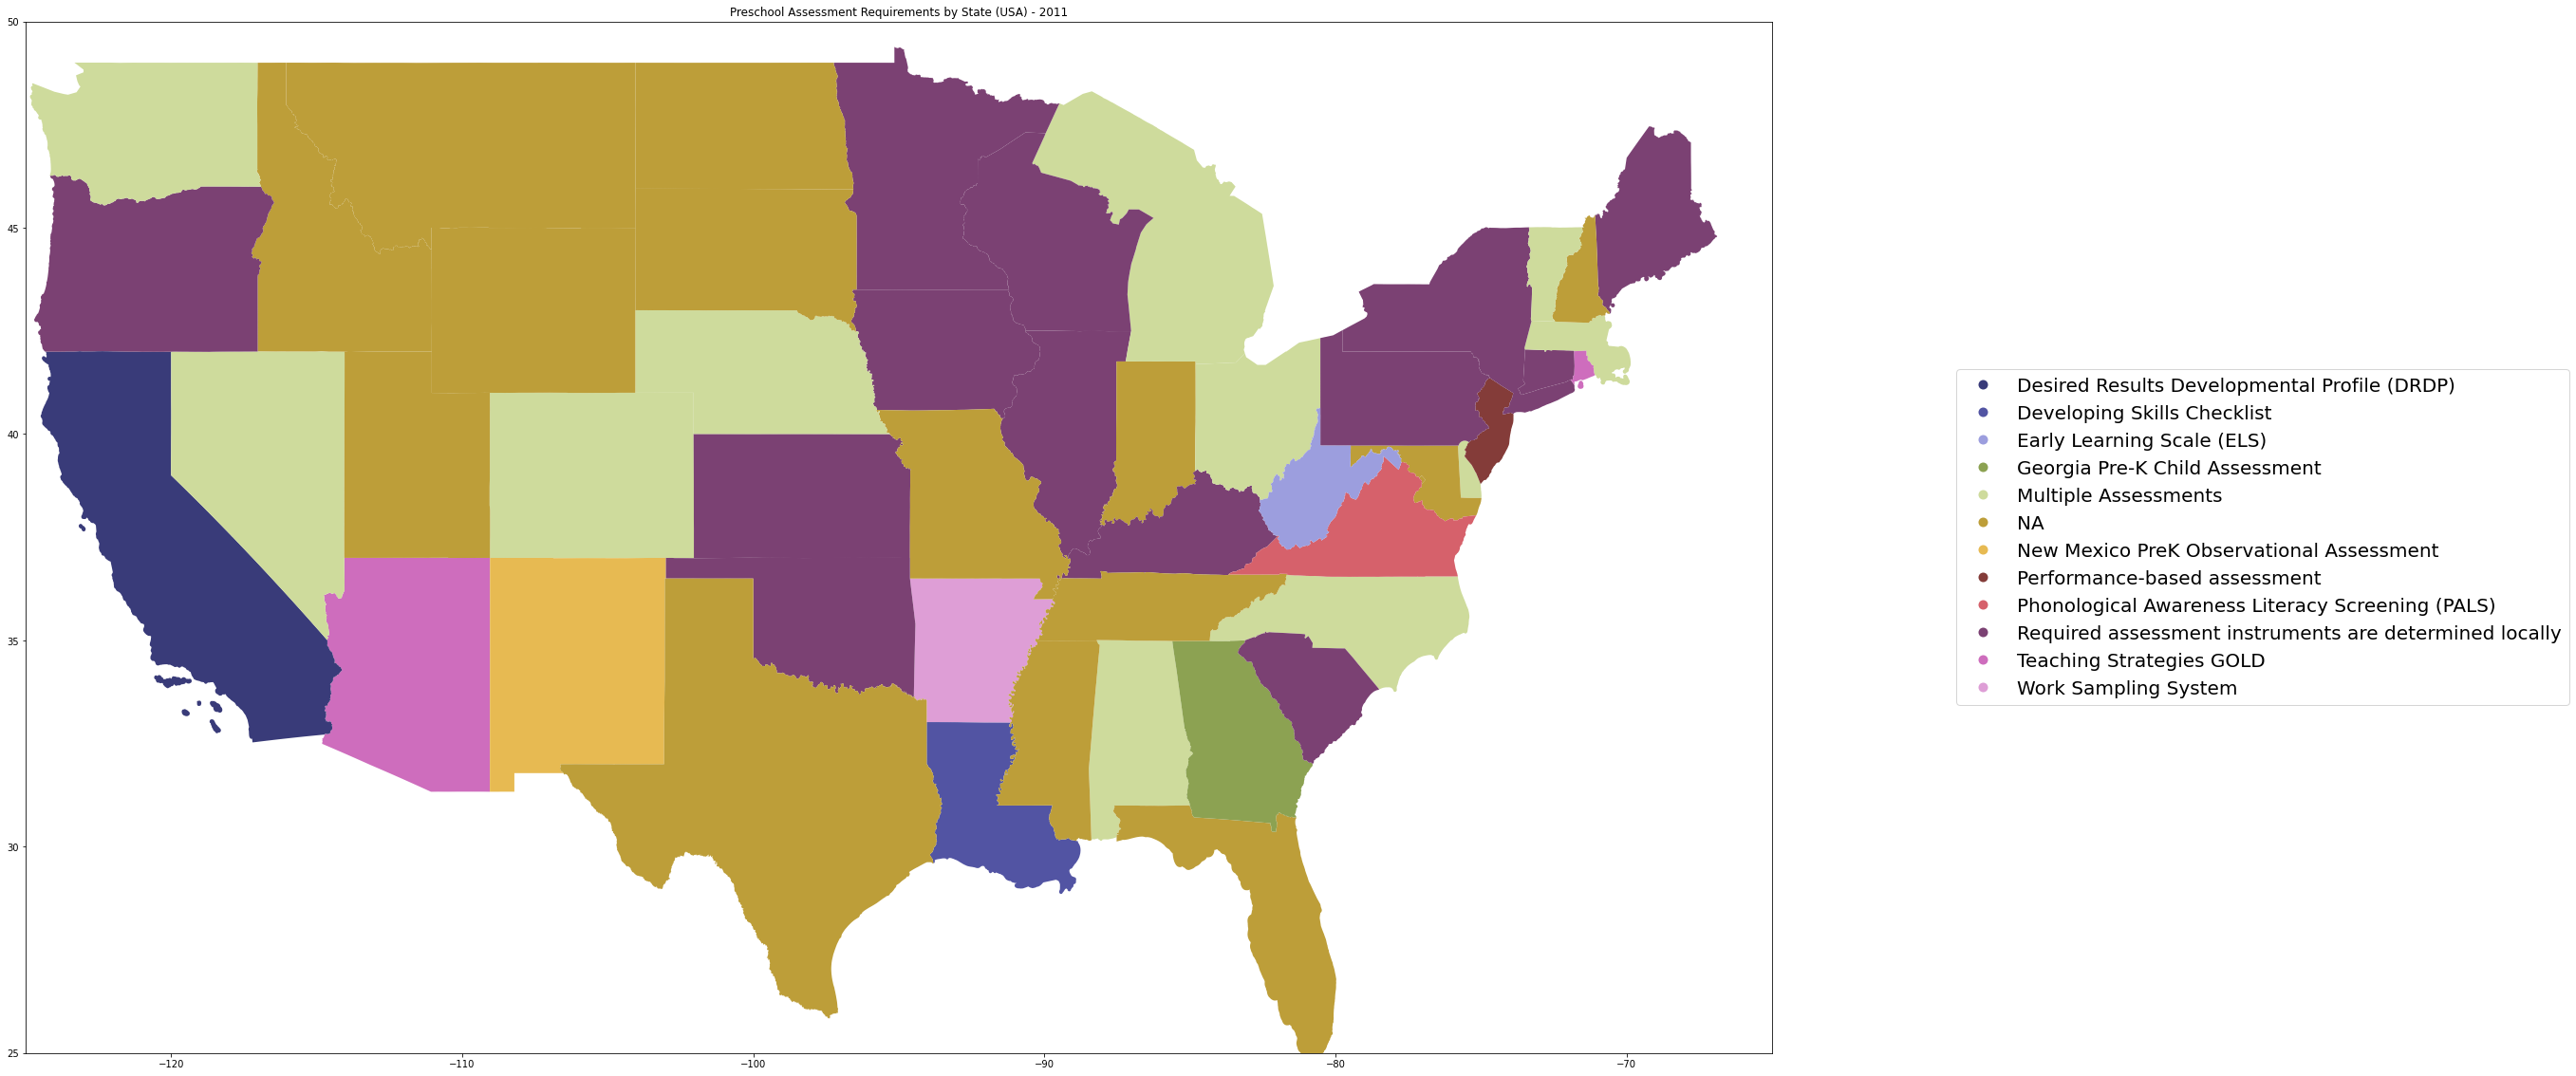

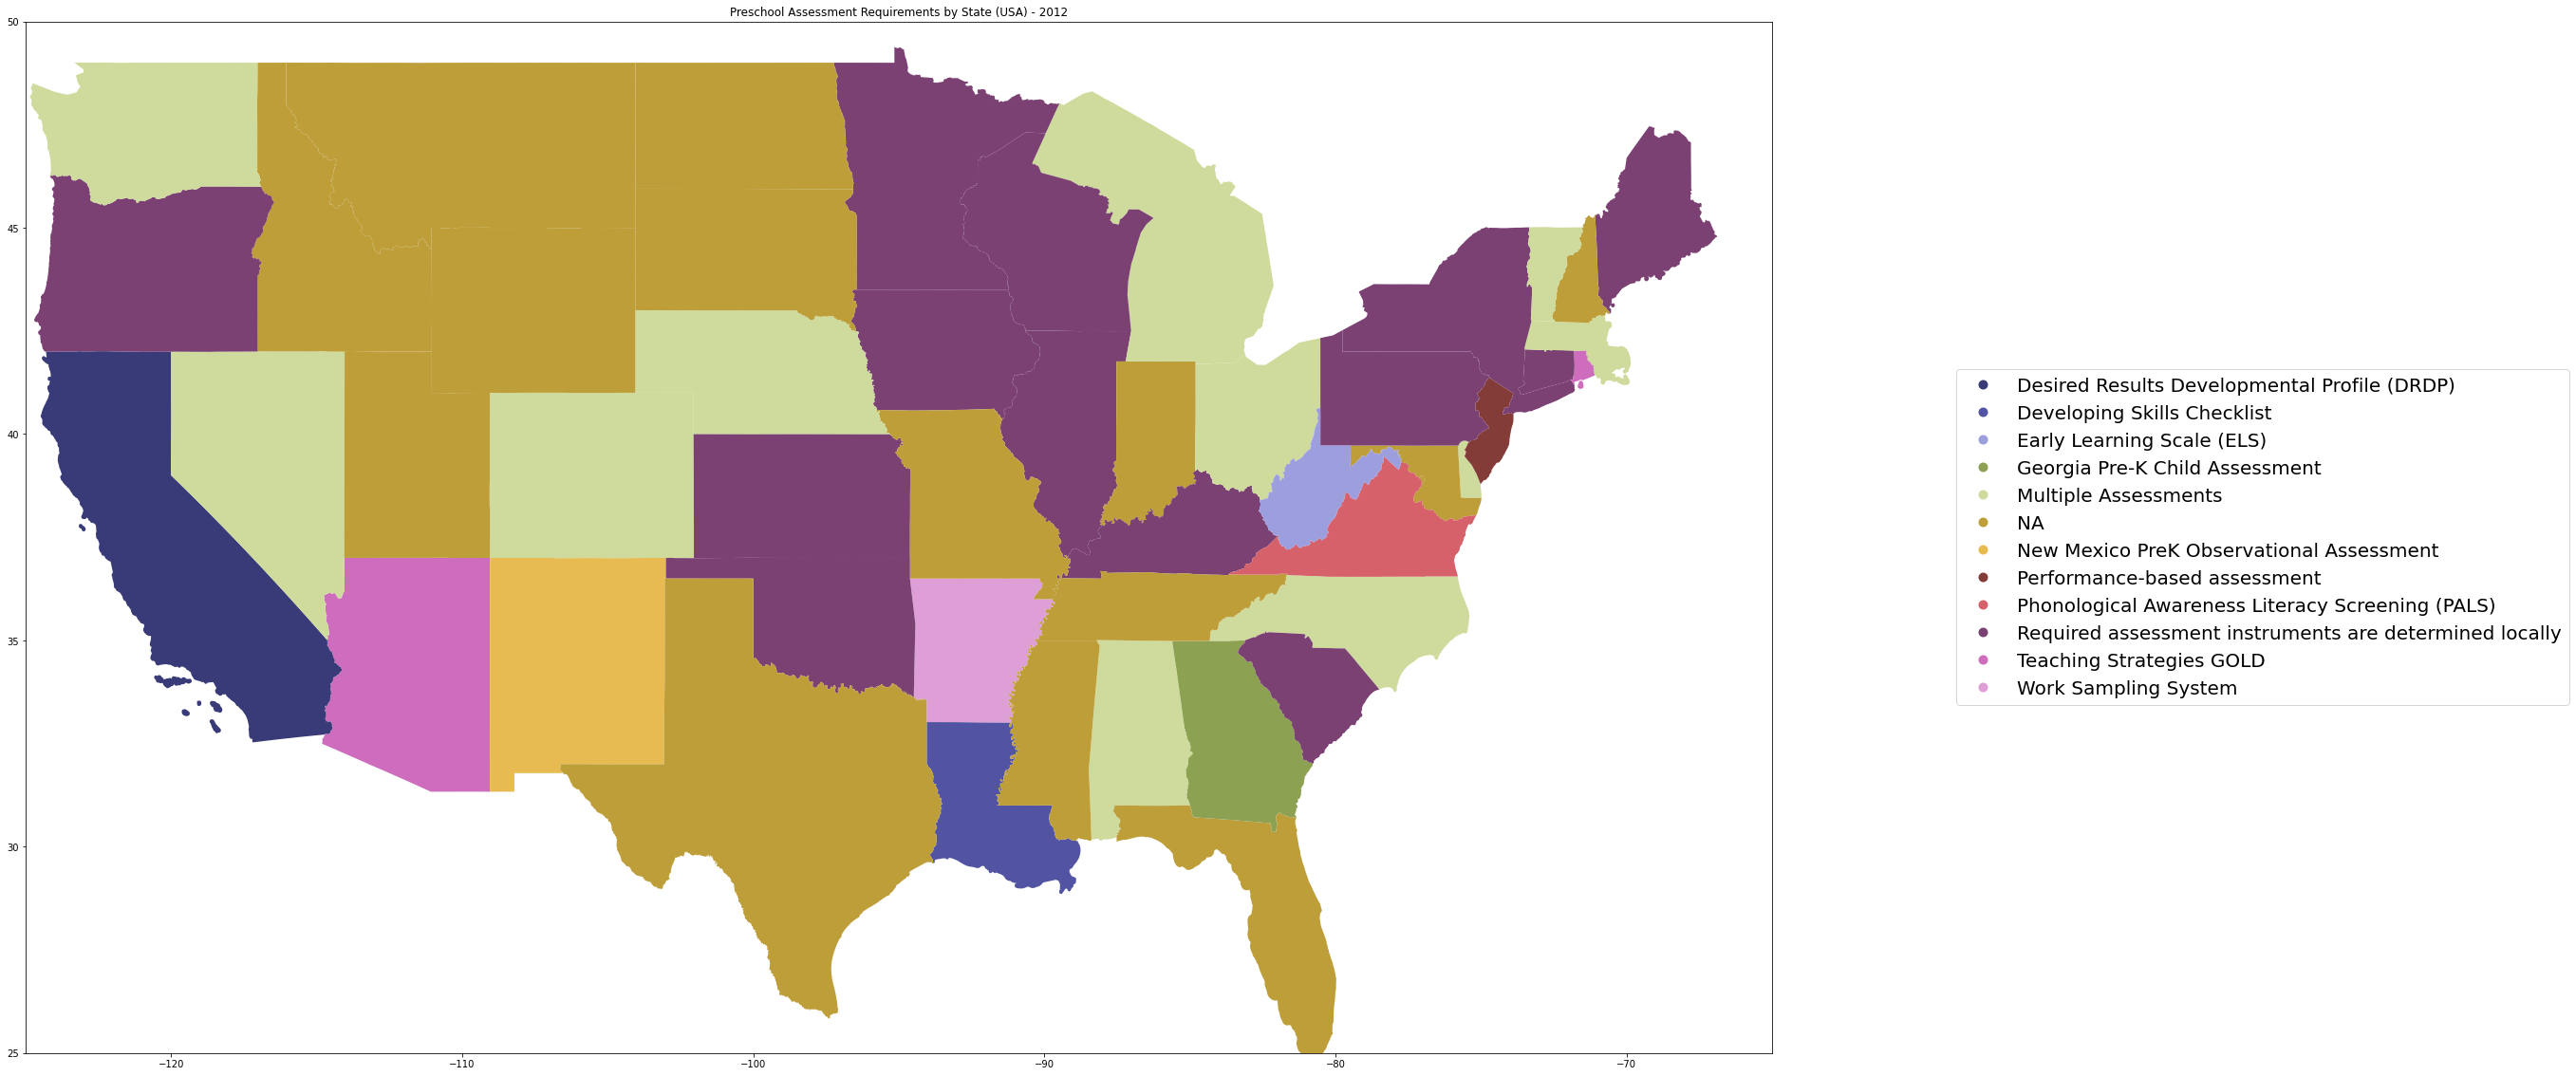

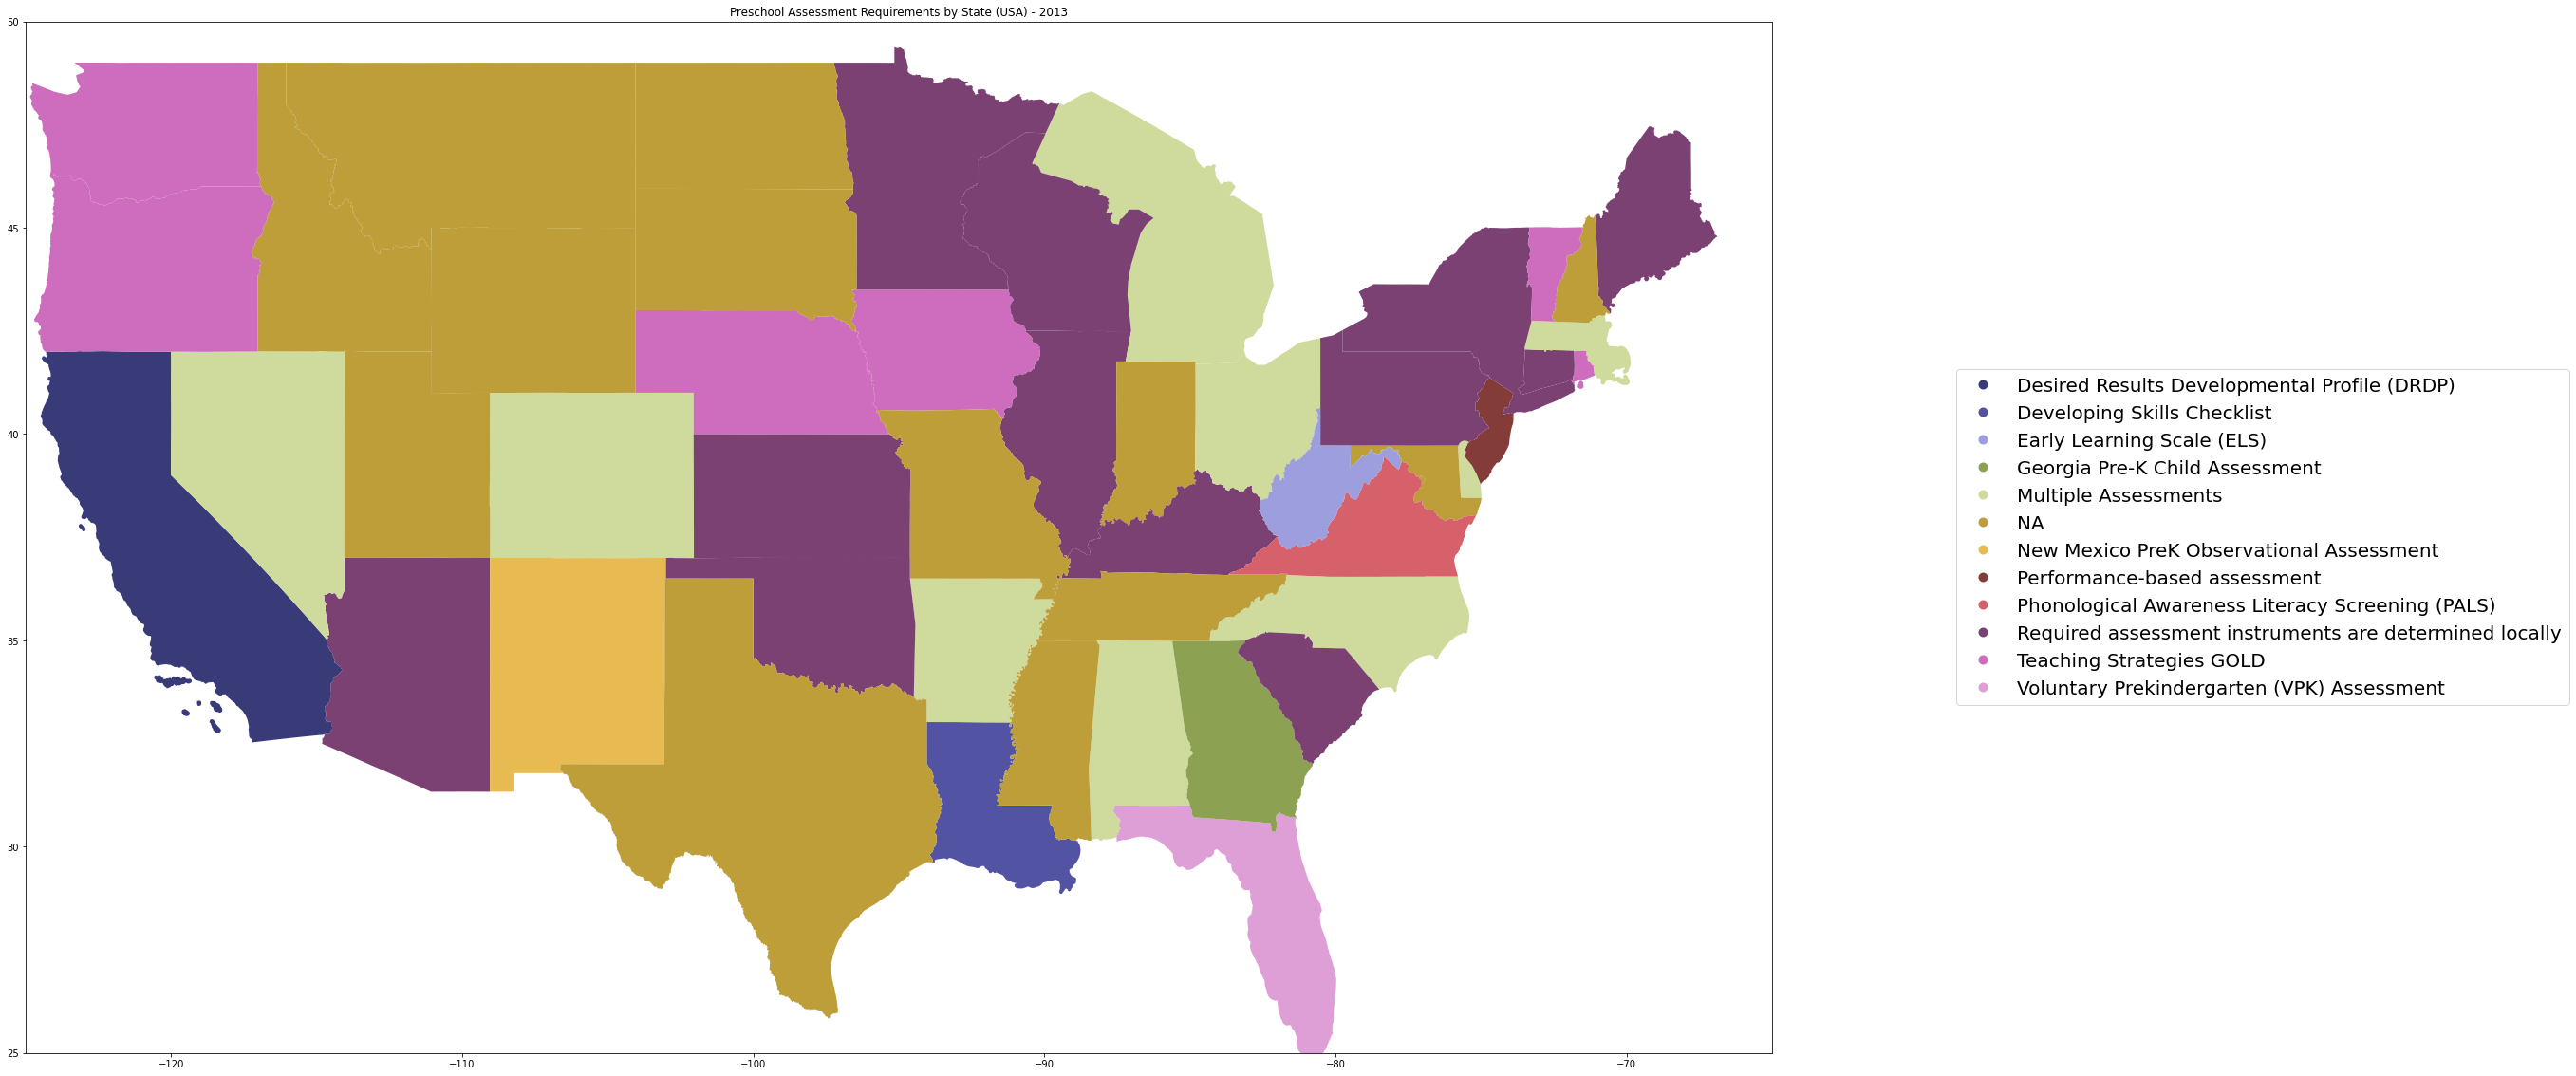

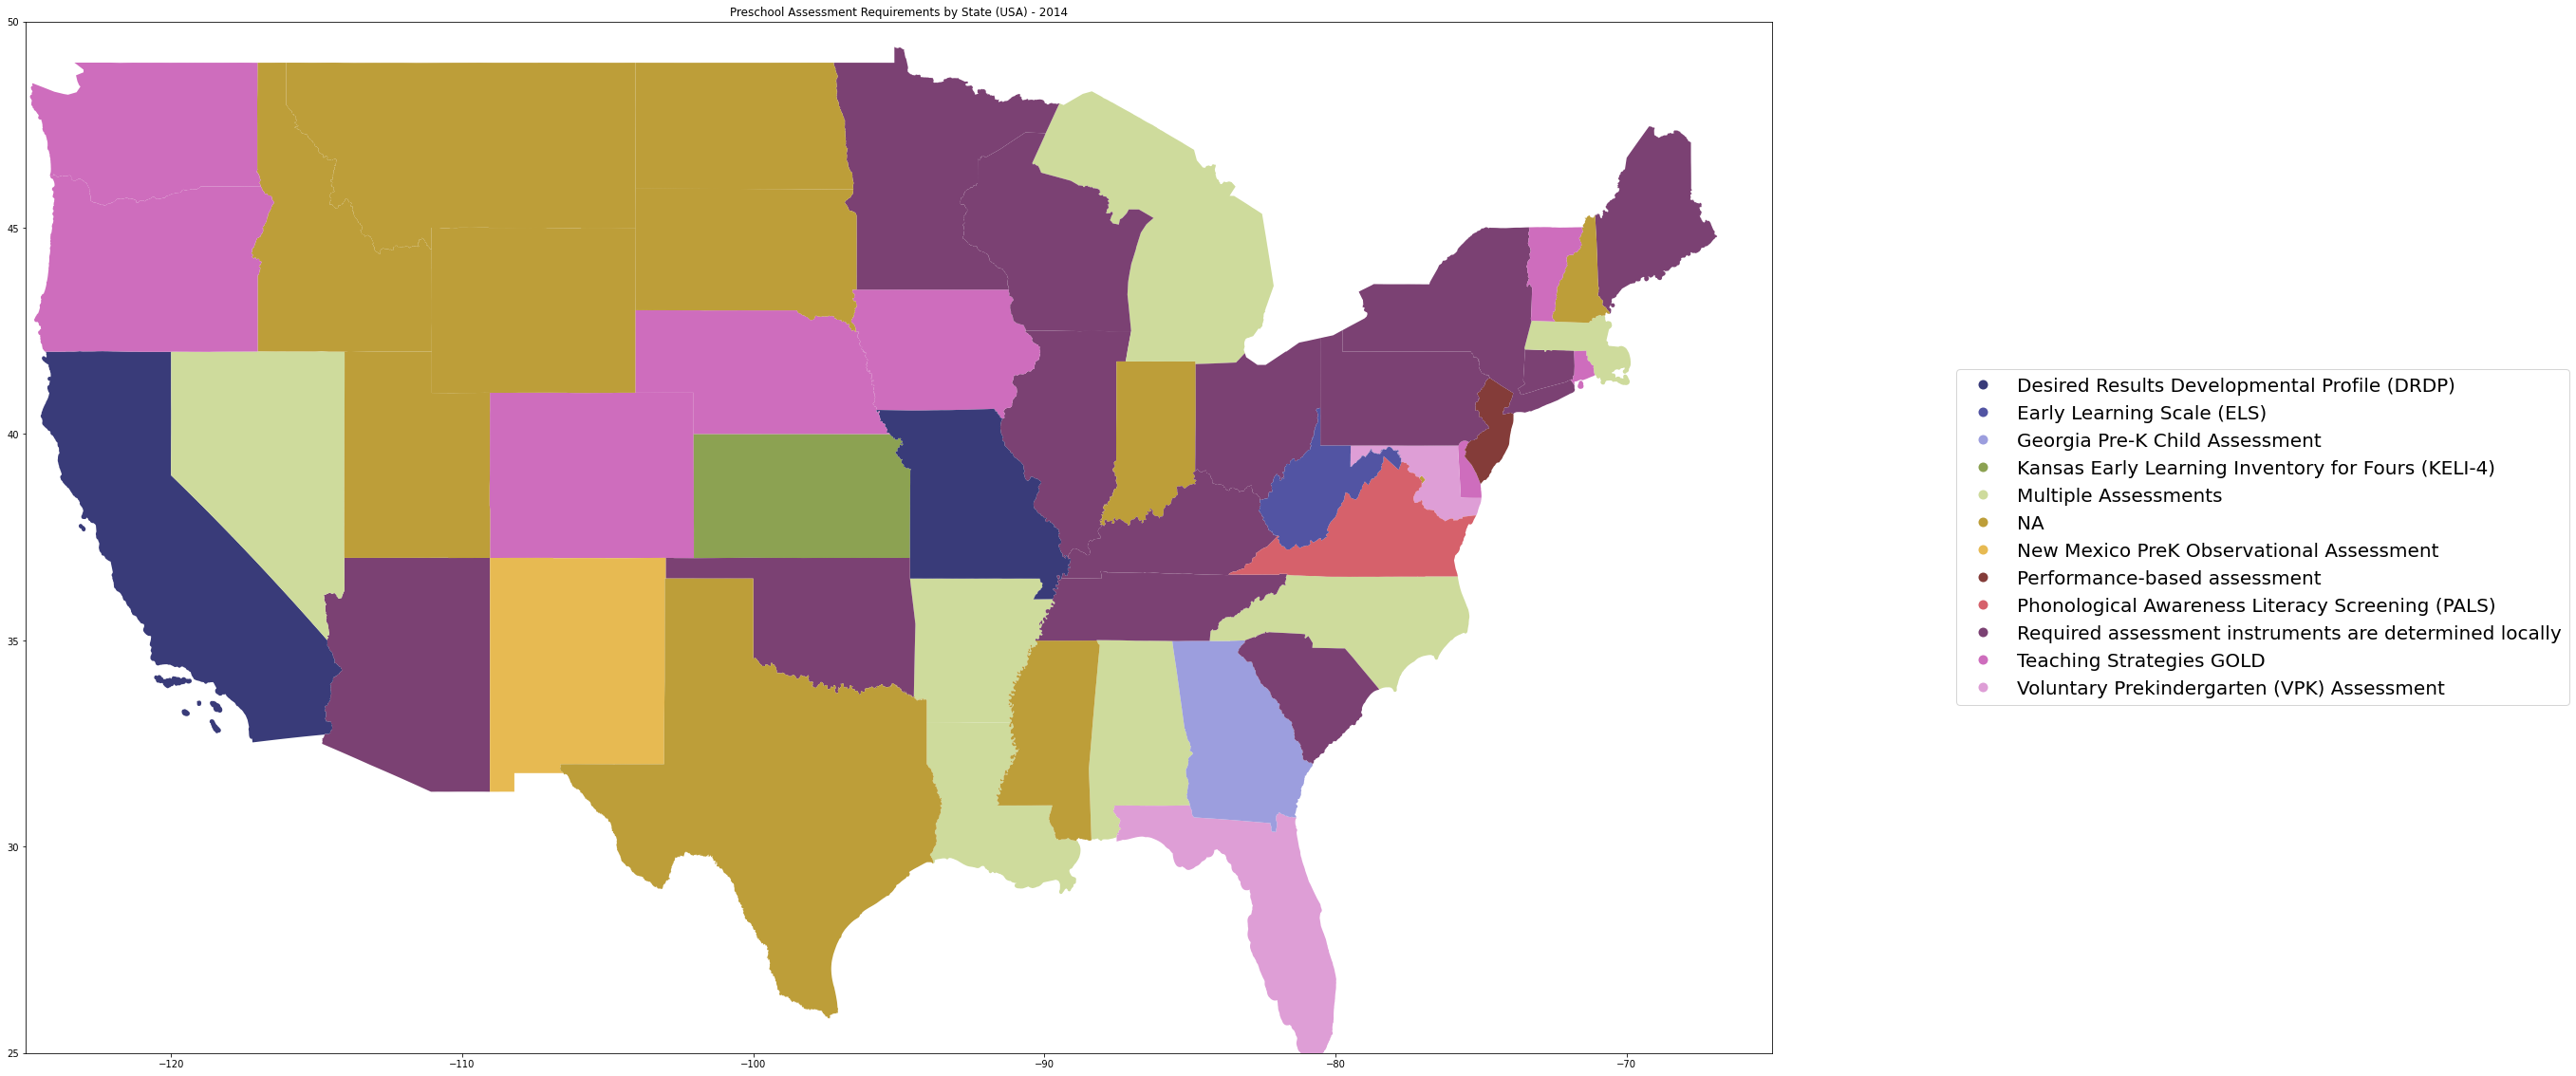

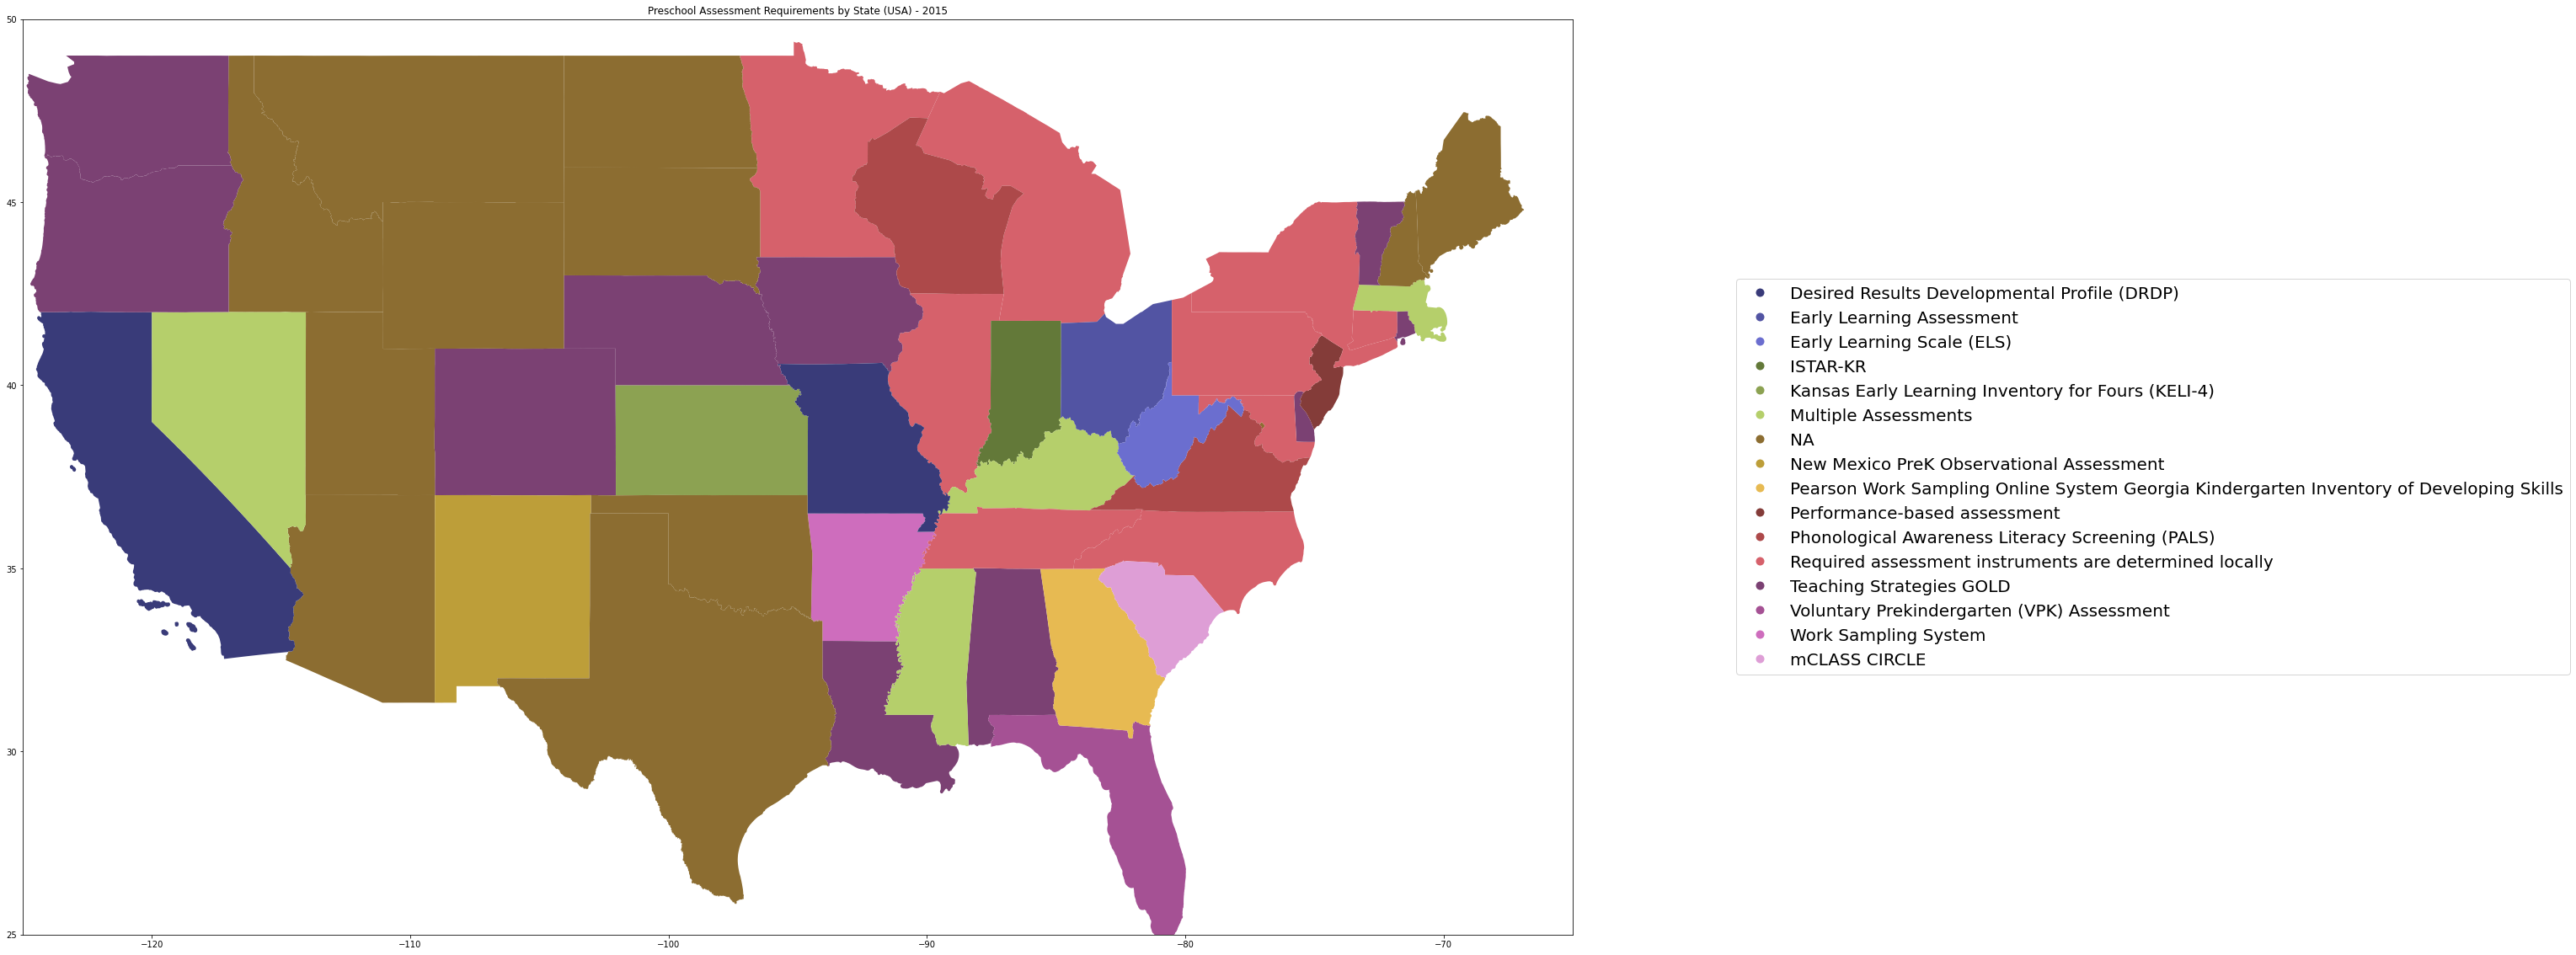

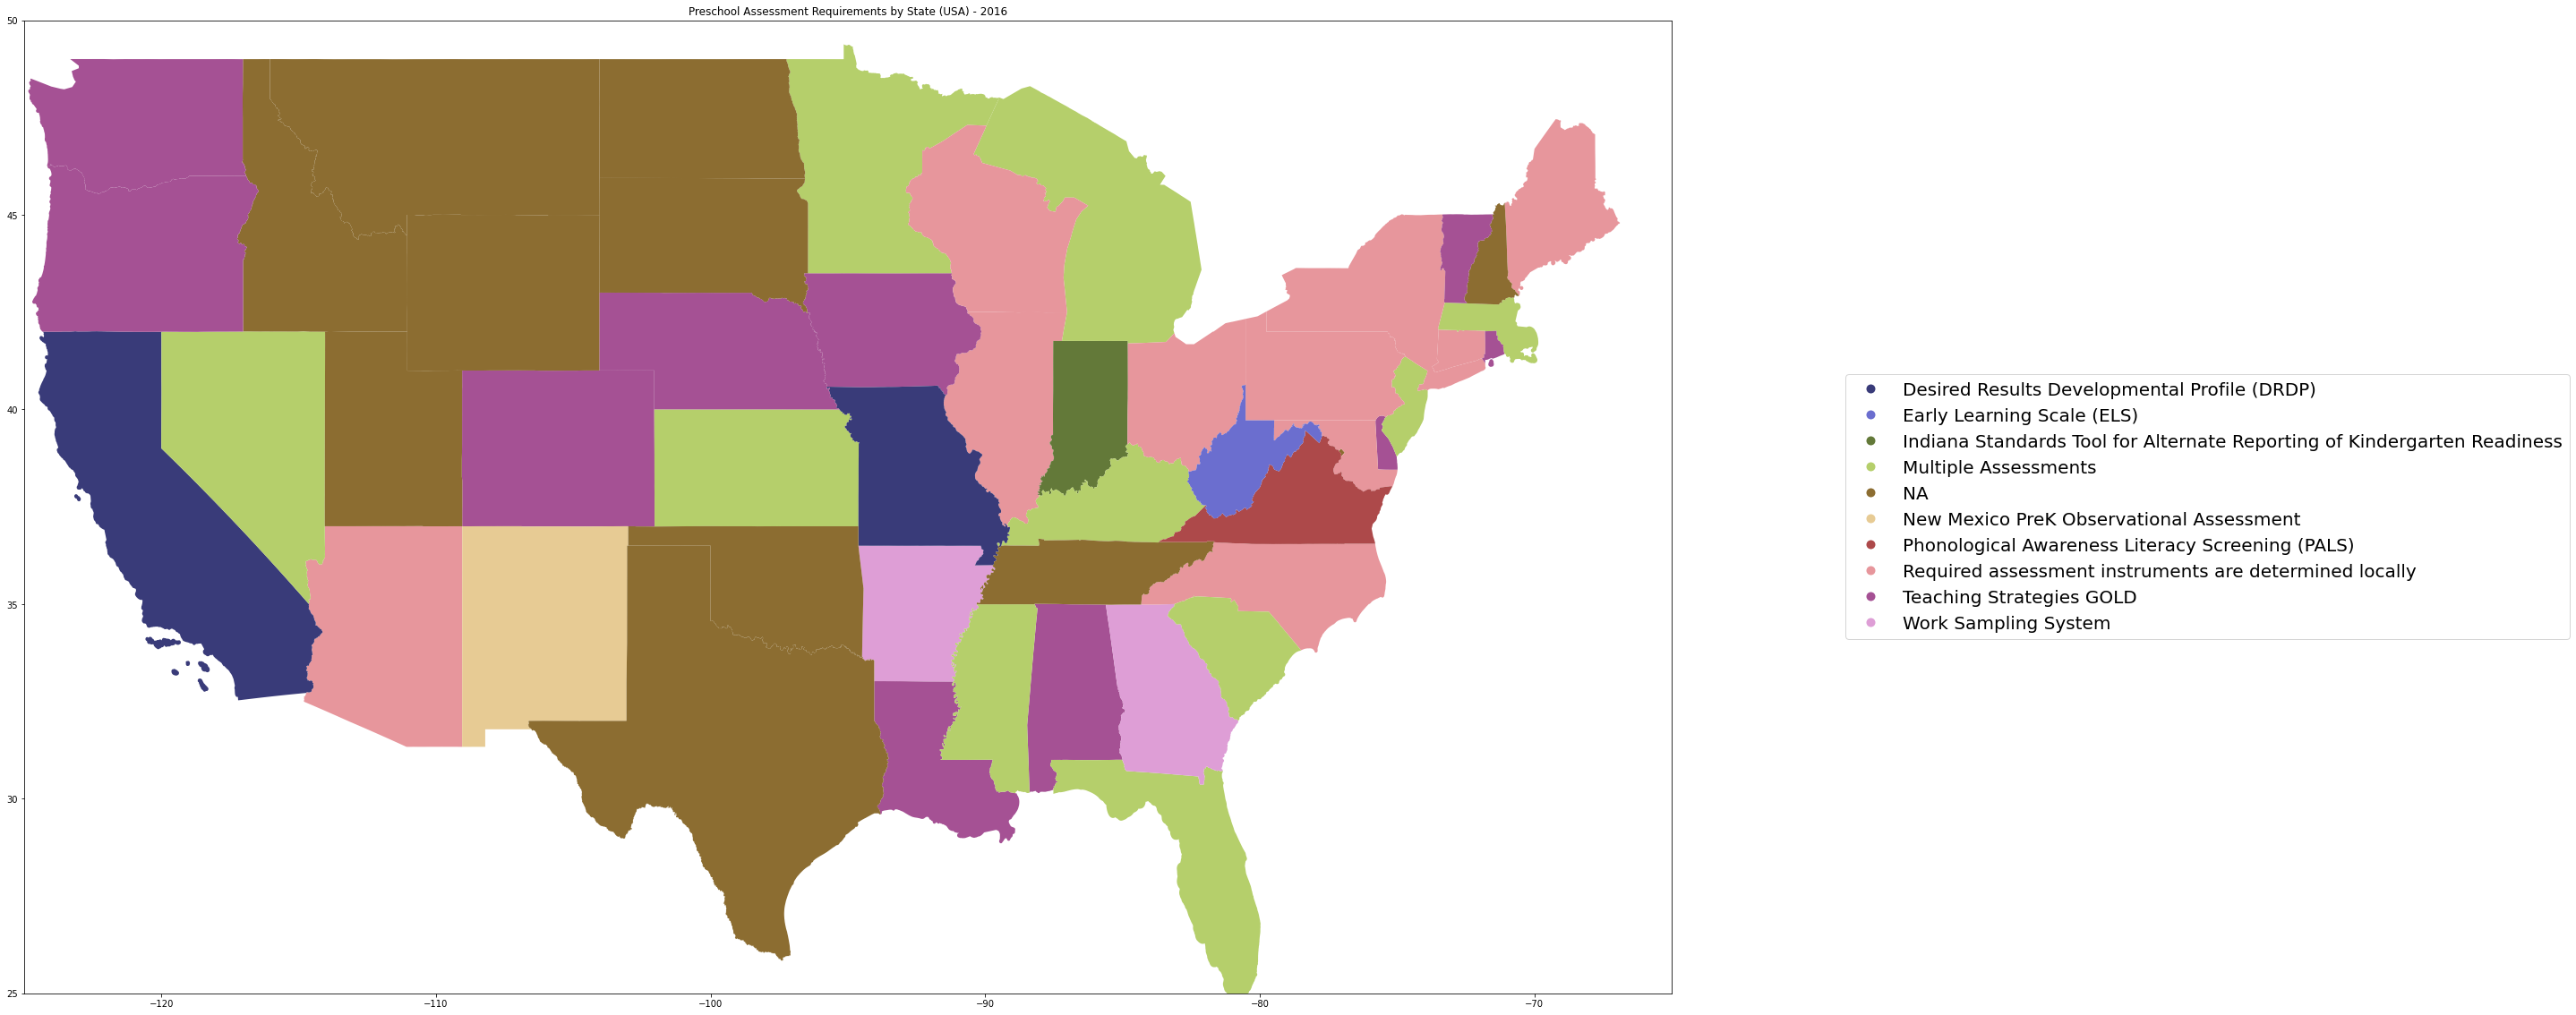

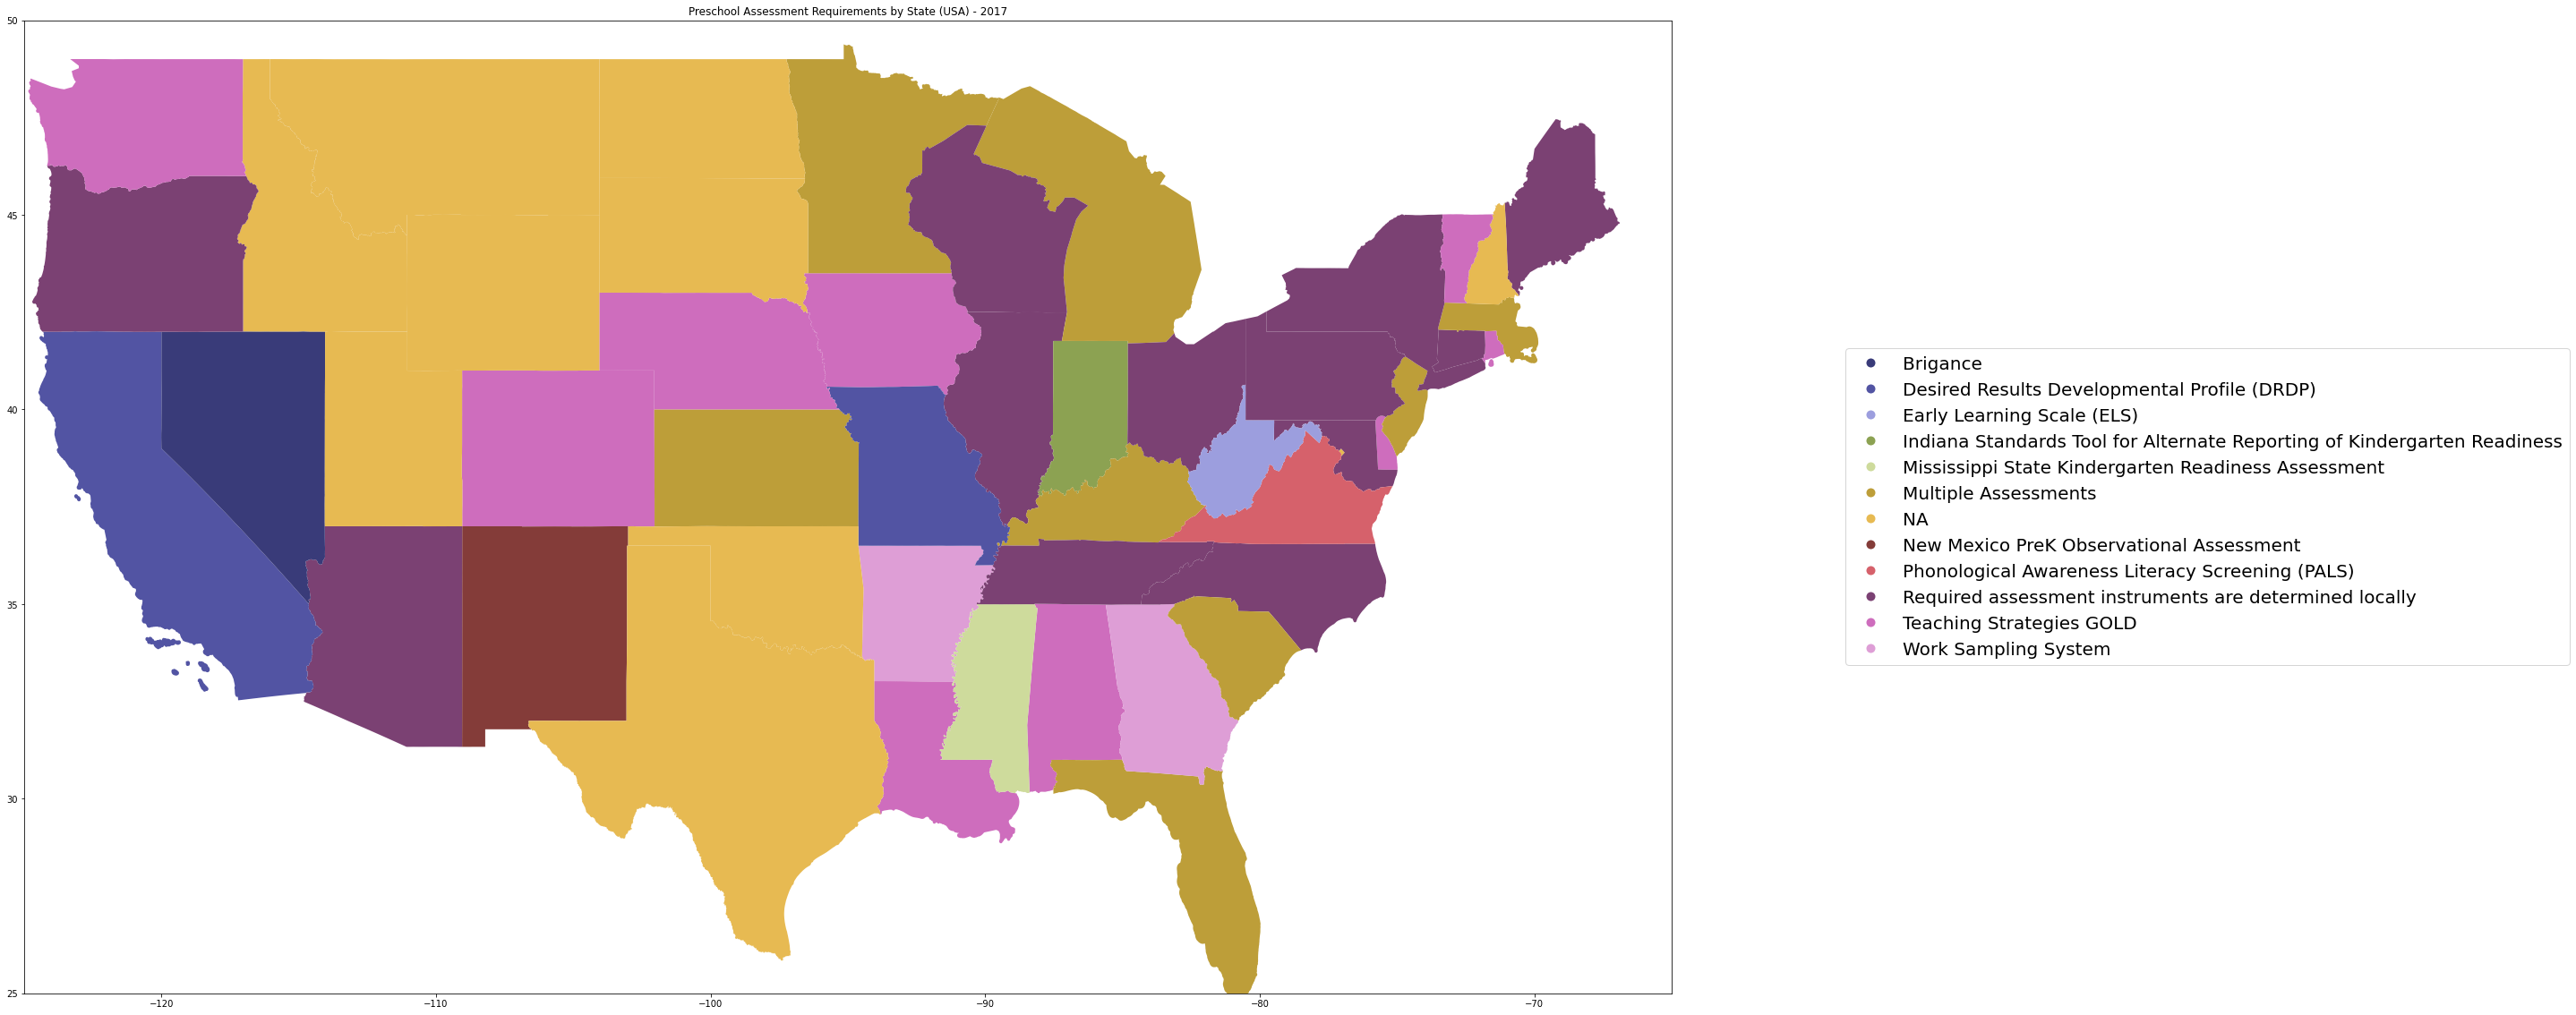

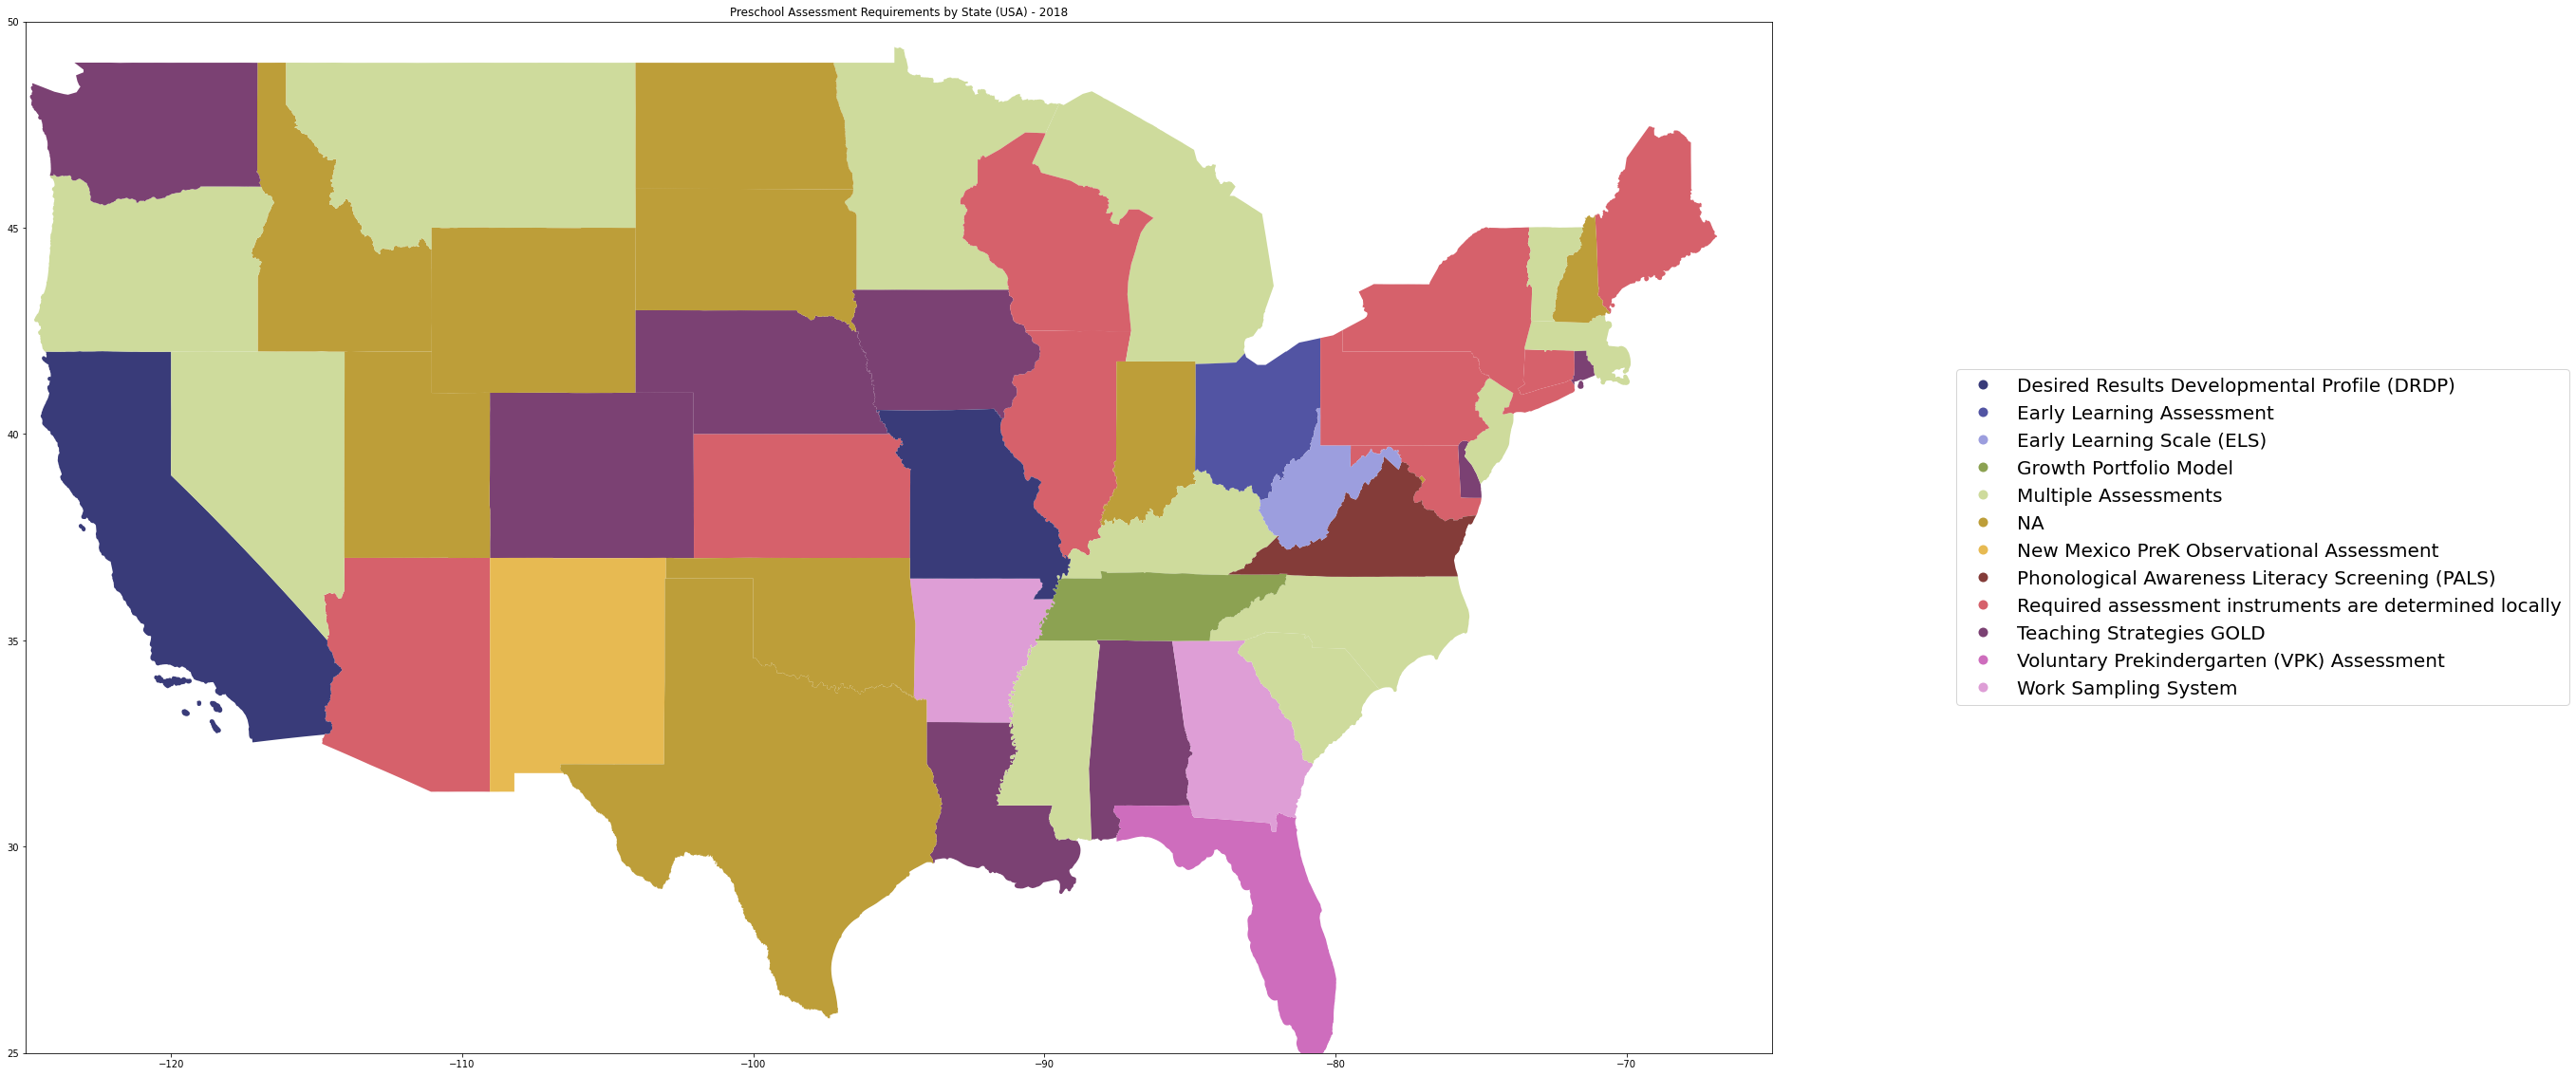

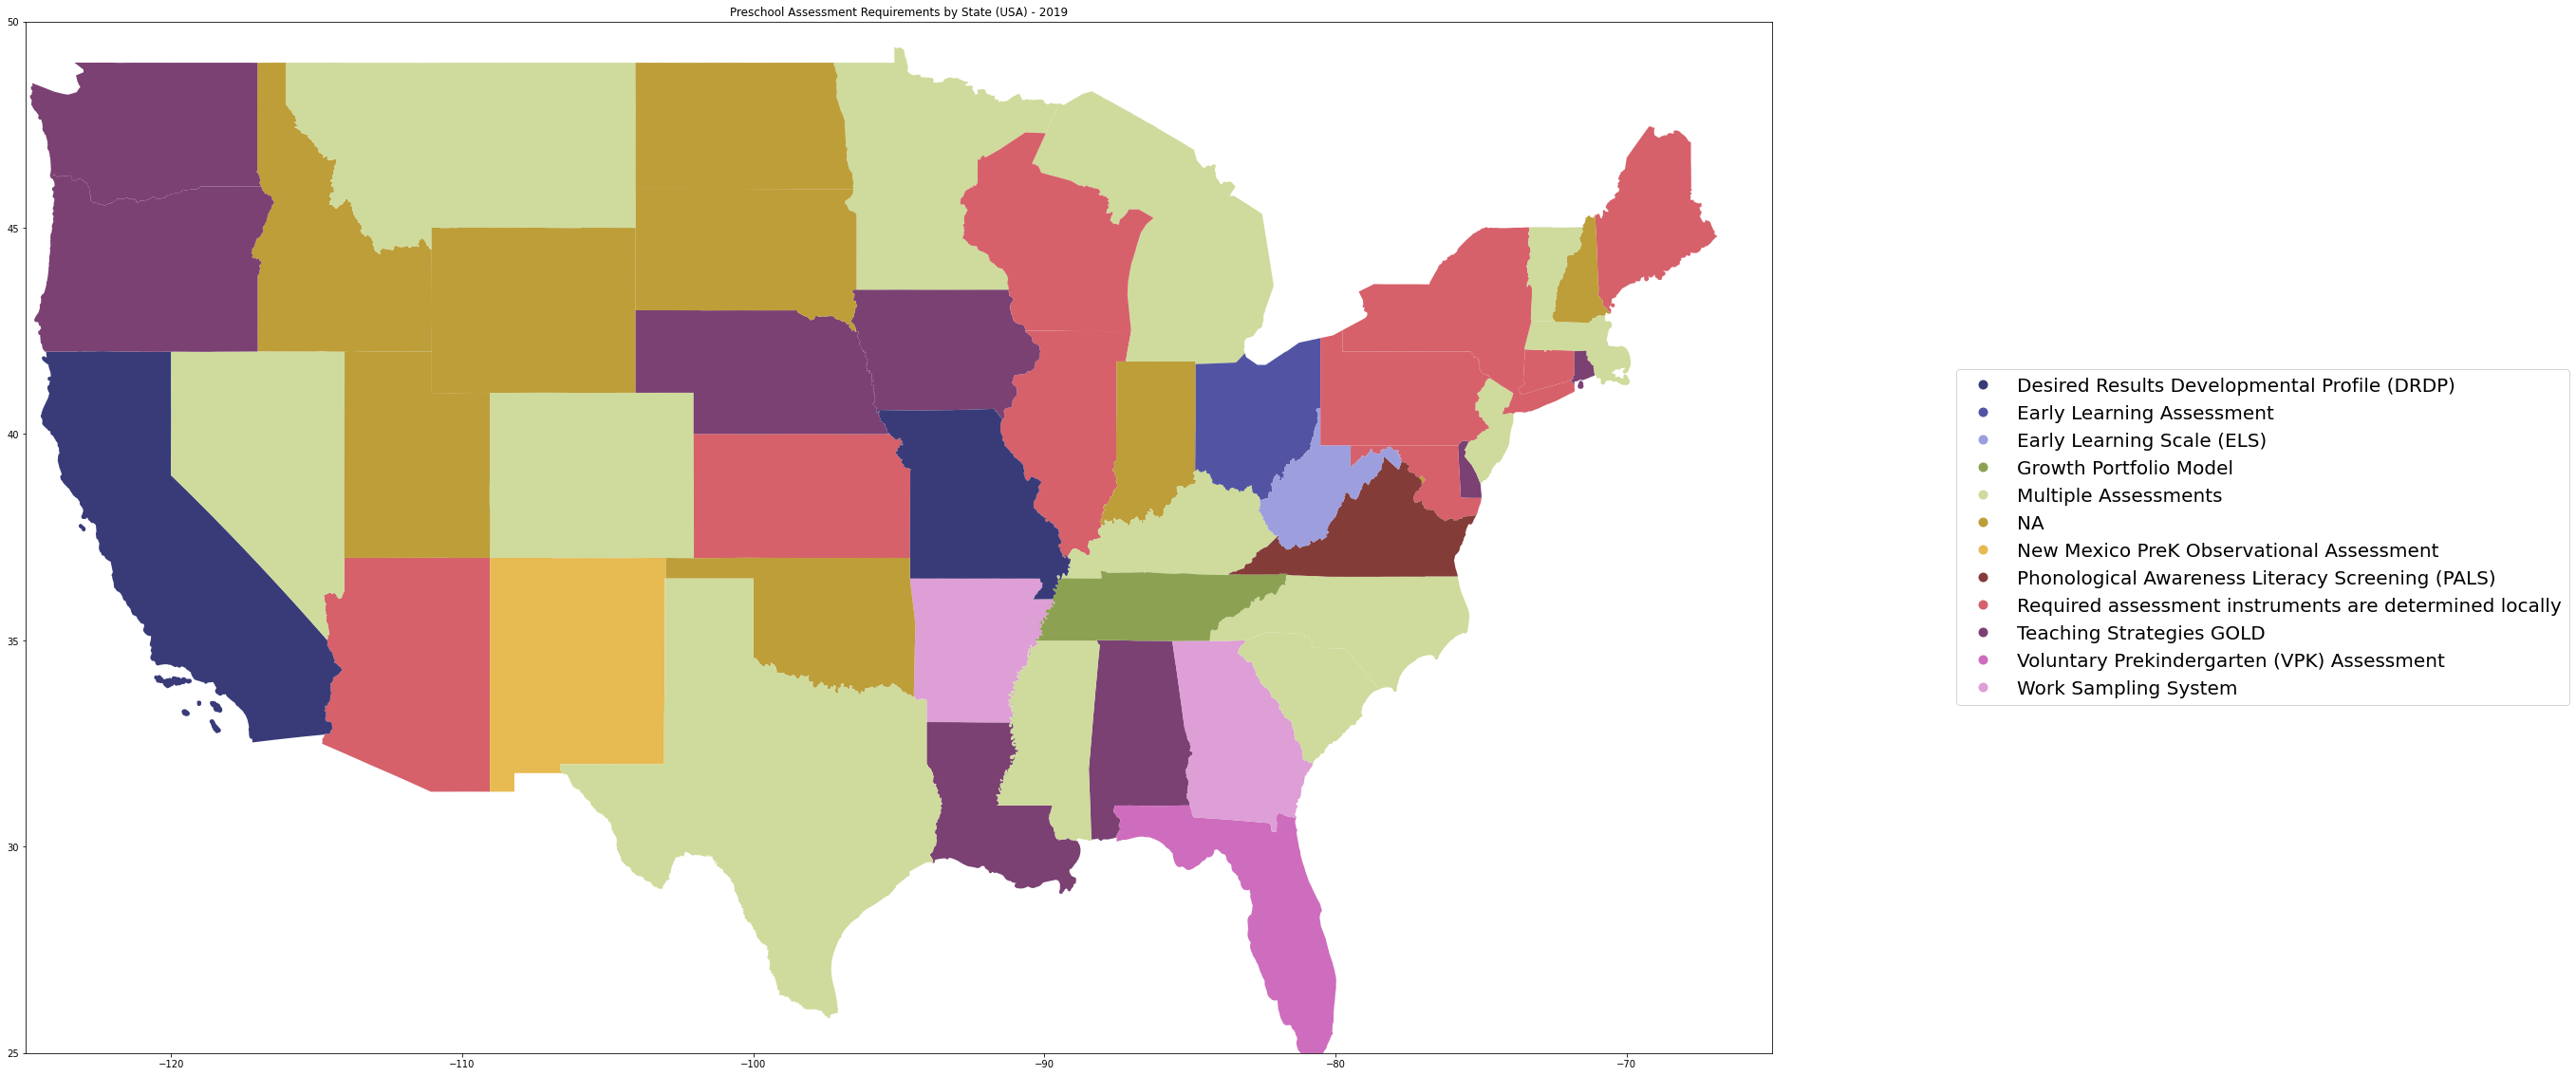

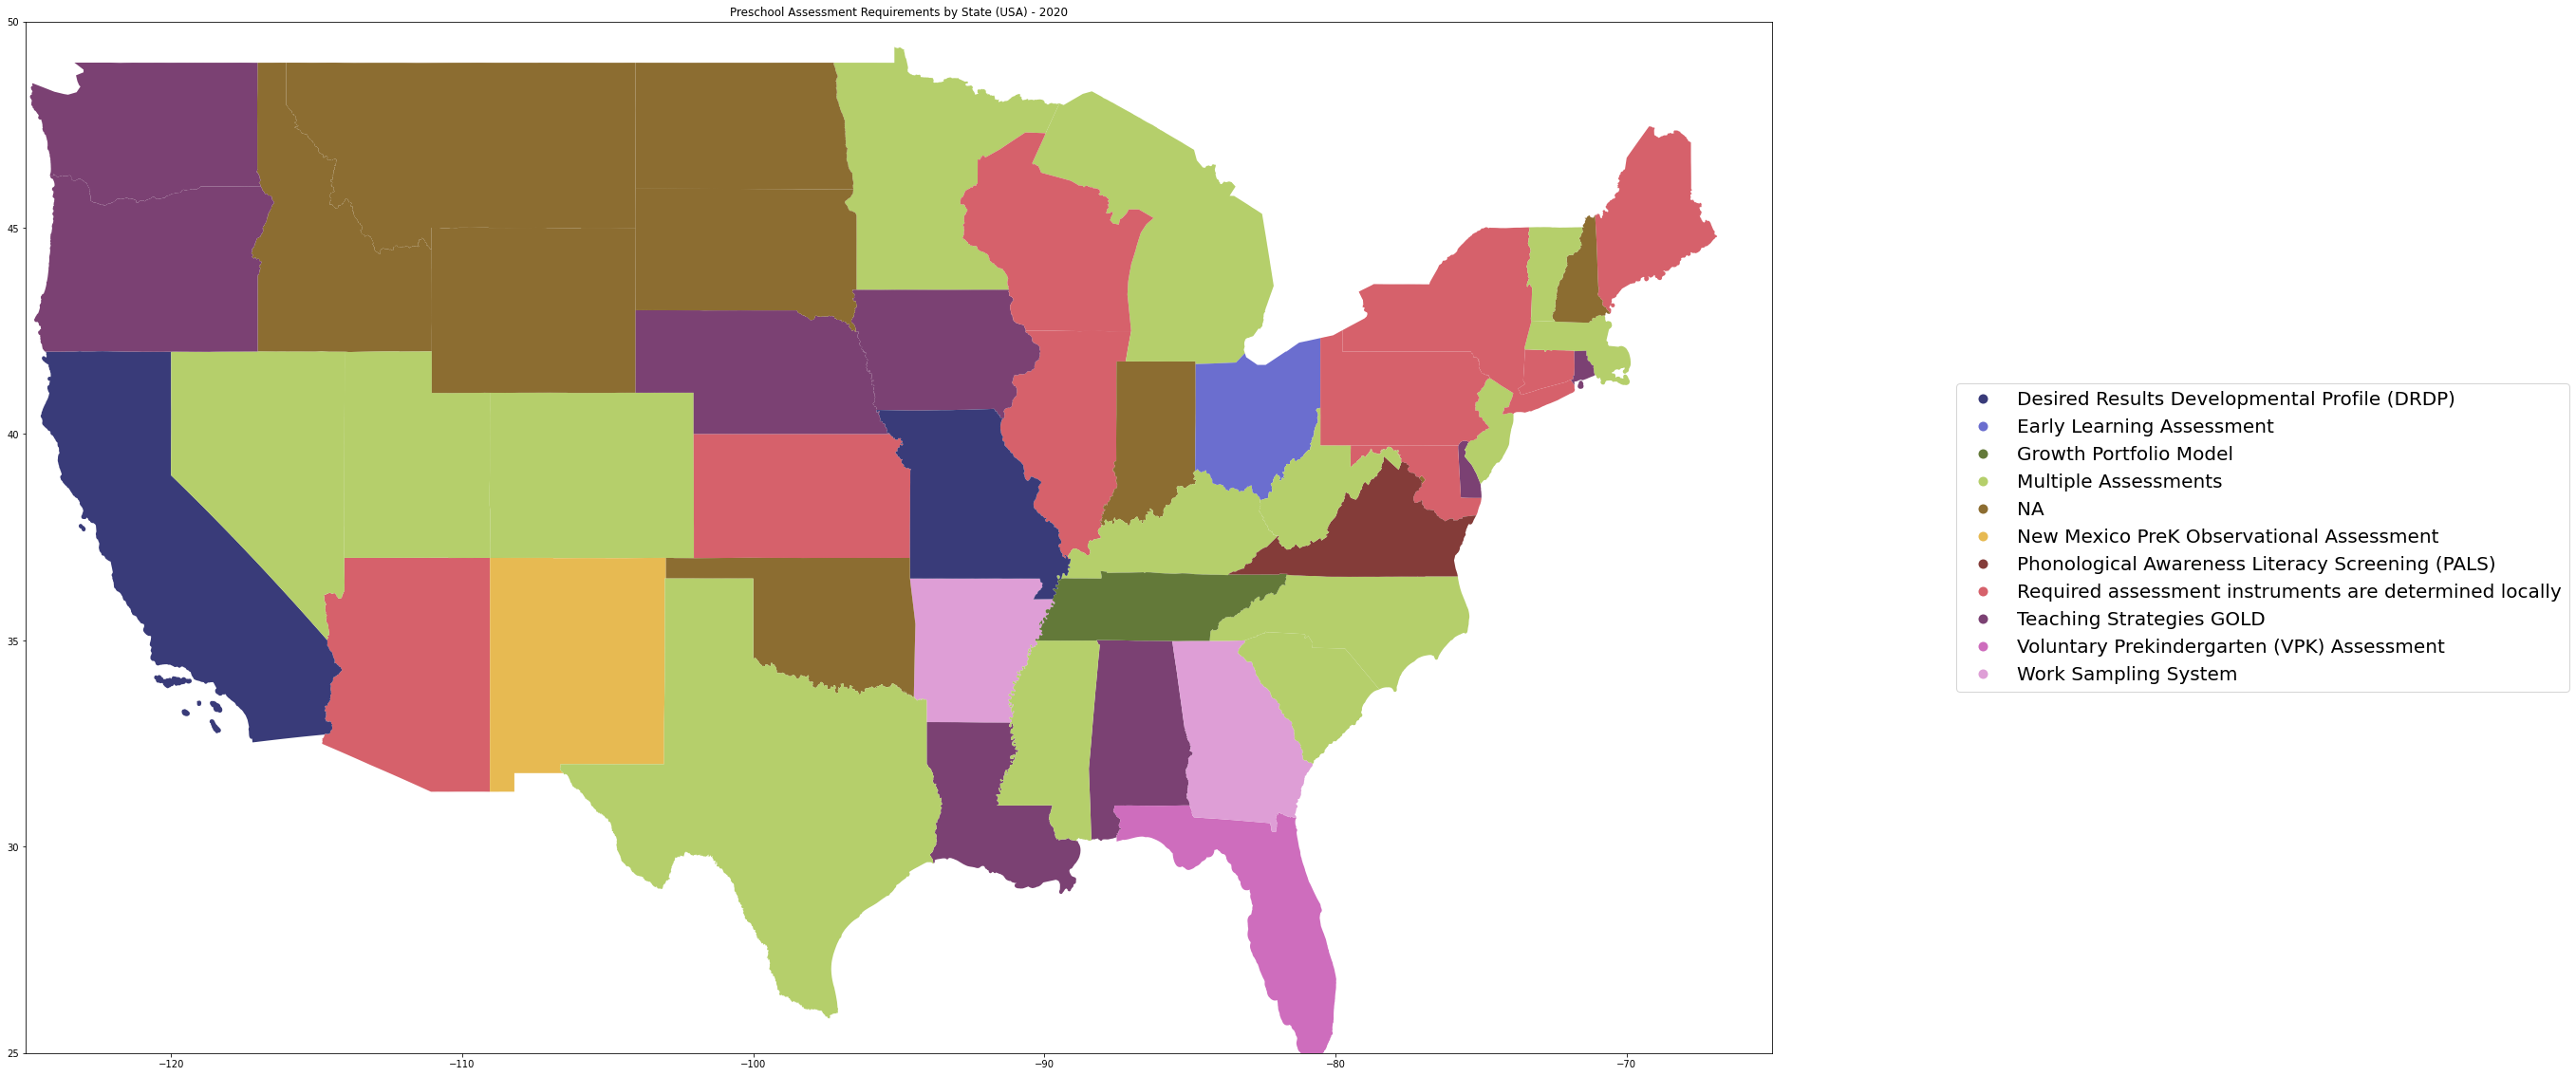

In [10]:
import matplotlib.pyplot as plt

# Convert DataFrame to GeoDataFrame
geo_gdf = gpd.GeoDataFrame(geo_merge, geometry="geometry")

# Iterate through the years and plot data for each year
unique_years = geo_gdf["Year"].unique()
for year in unique_years:
    fig, ax = plt.subplots(1, 1, figsize=(35, 20))
    geo_gdf[geo_gdf["Year"] == year].plot(
        column="RequiredAssessmentforpreK",
        ax=ax,
        legend=True,
        cmap="tab20b",
        legend_kwds={
            "loc": "center left",
            "bbox_to_anchor": (1.1, 0.5),
            "fontsize": 20,
        },
    )
    plt.ylim(25, 50)
    plt.xlim(-125, -65)
    plt.title(f"Preschool Assessment Requirements by State (USA) - {year}")
    plt.show()

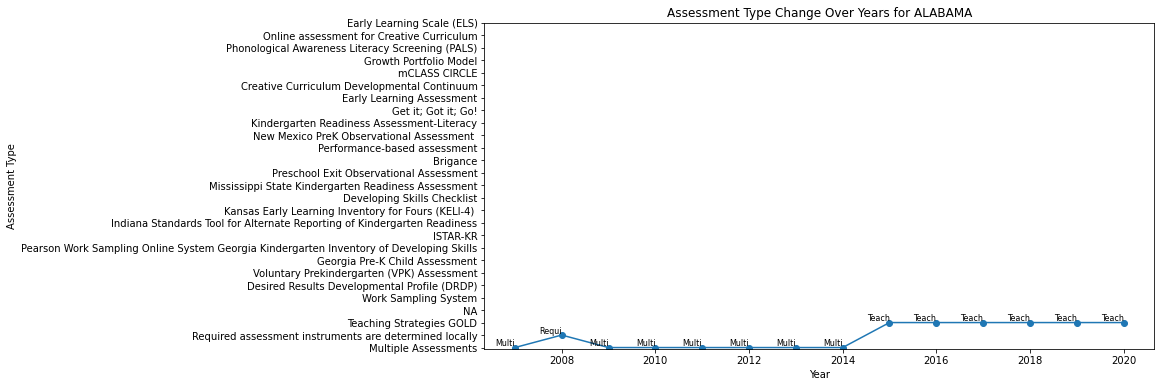

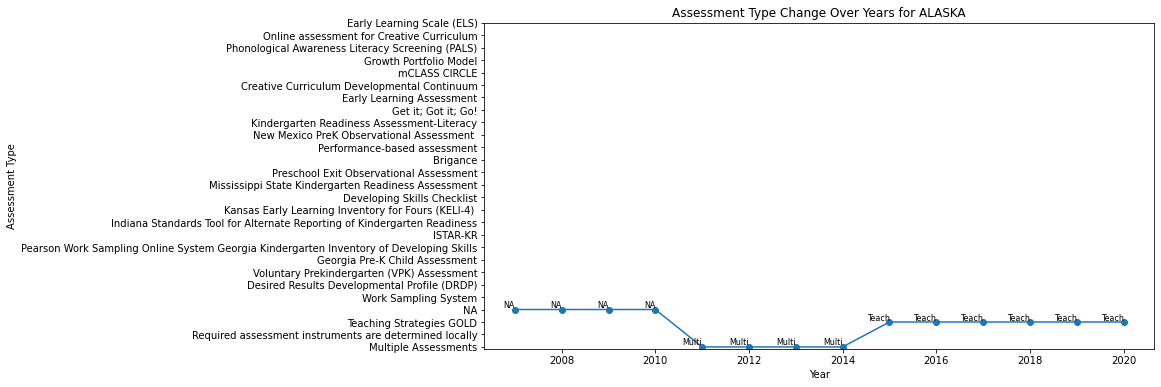

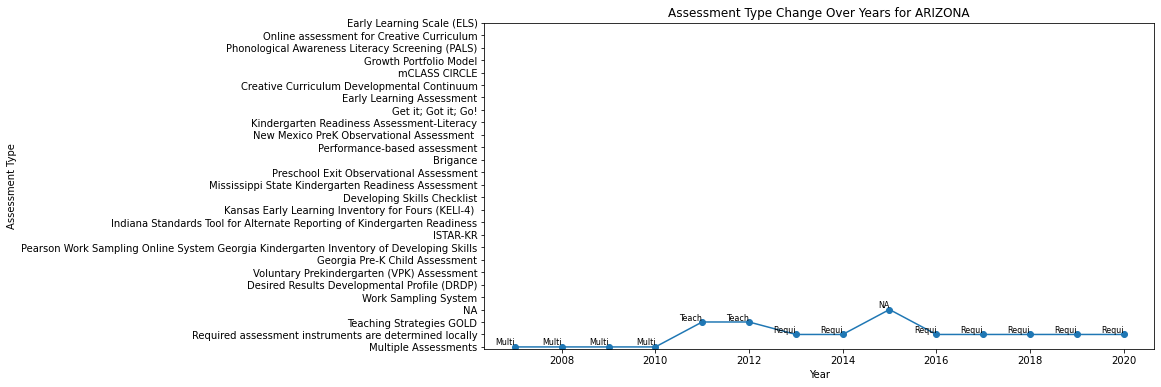

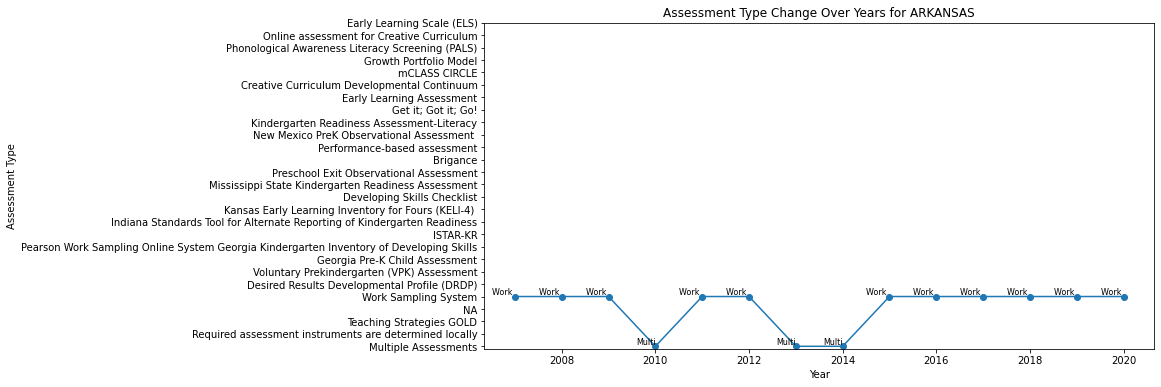

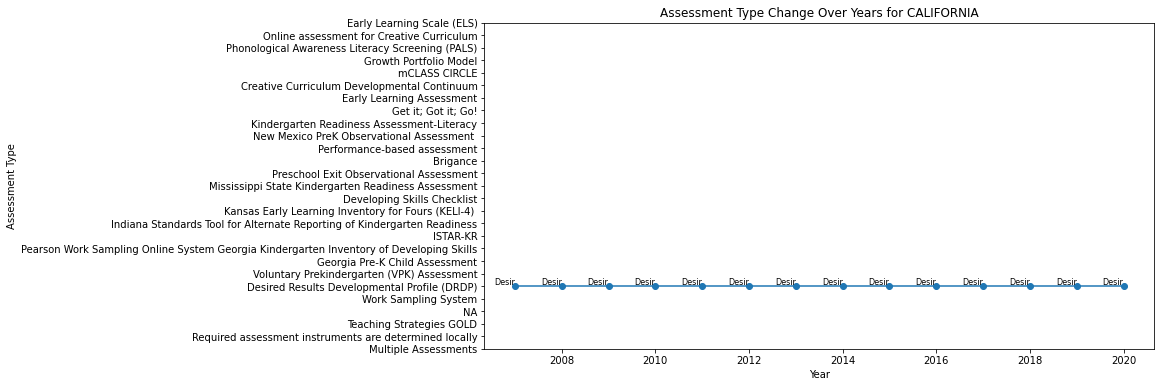

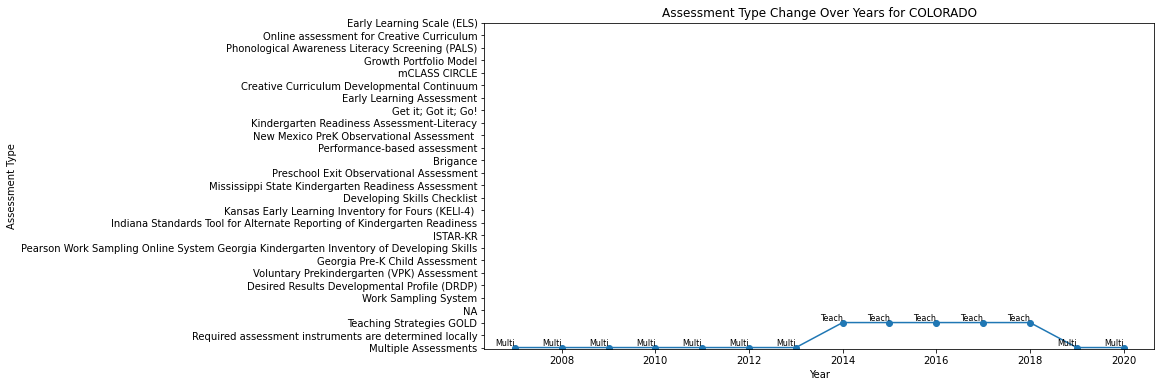

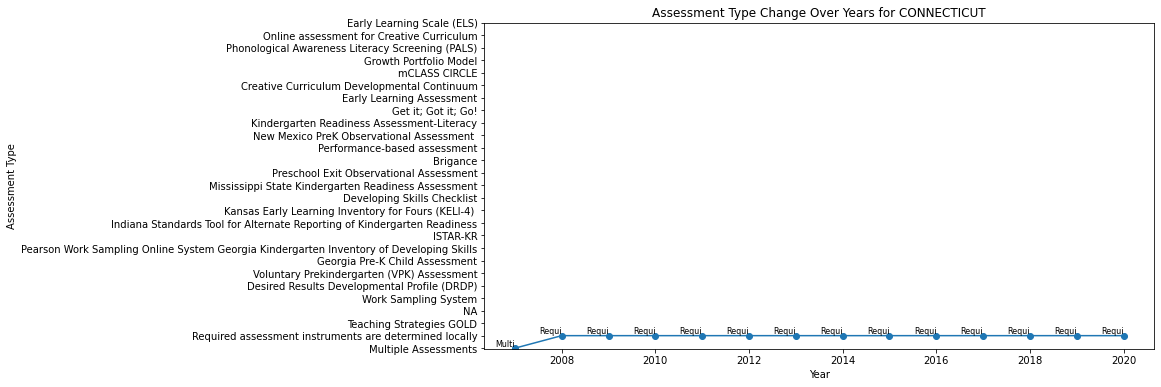

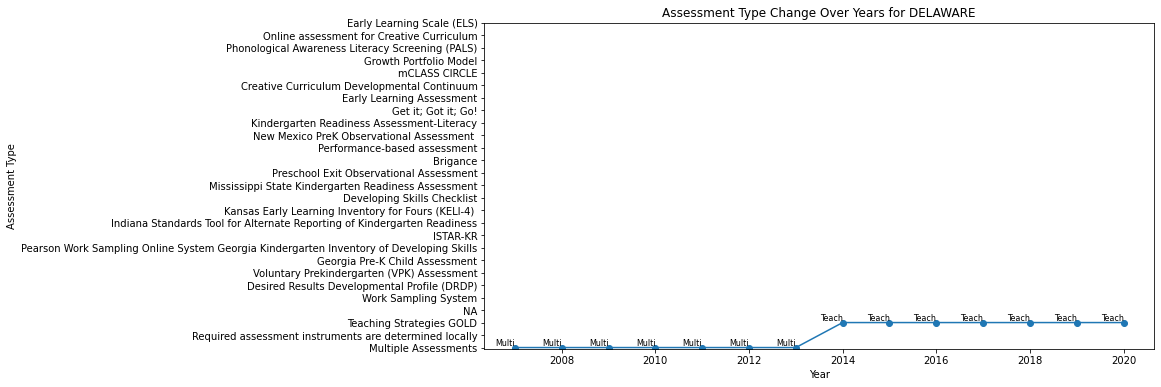

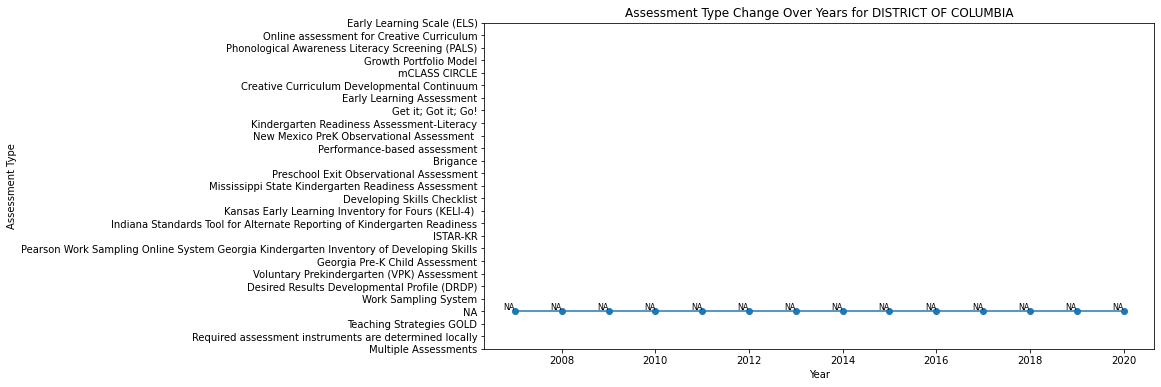

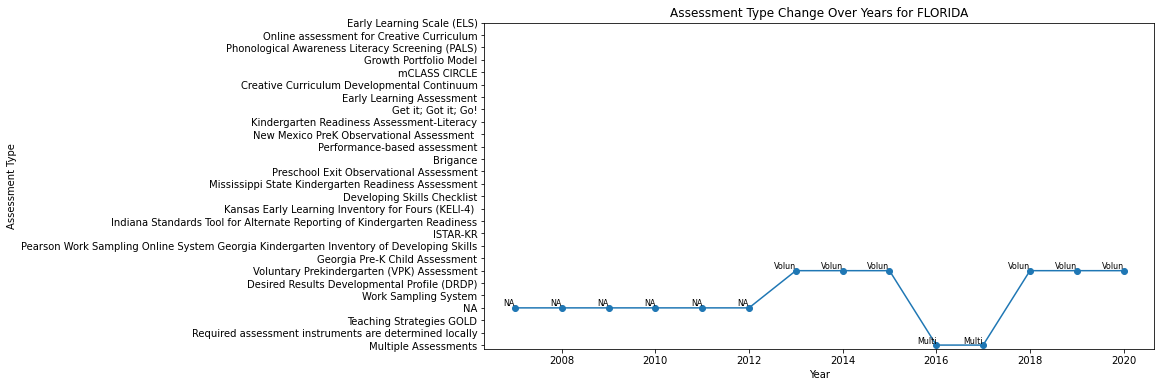

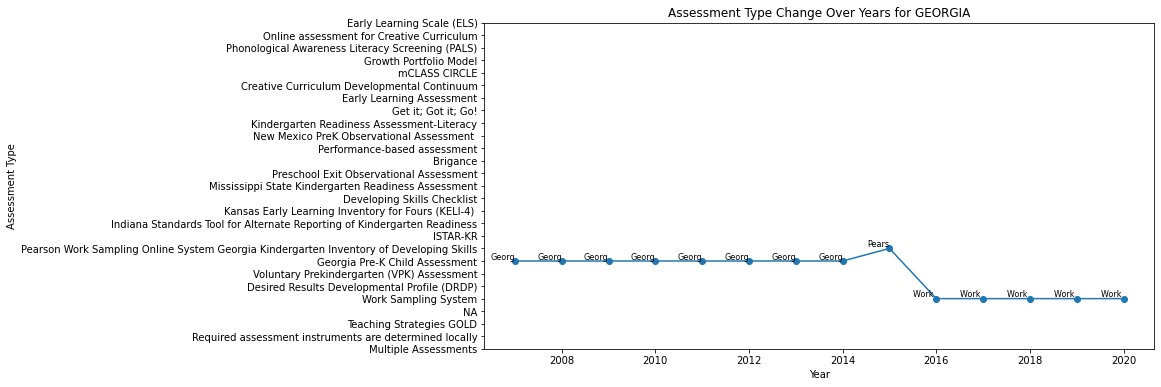

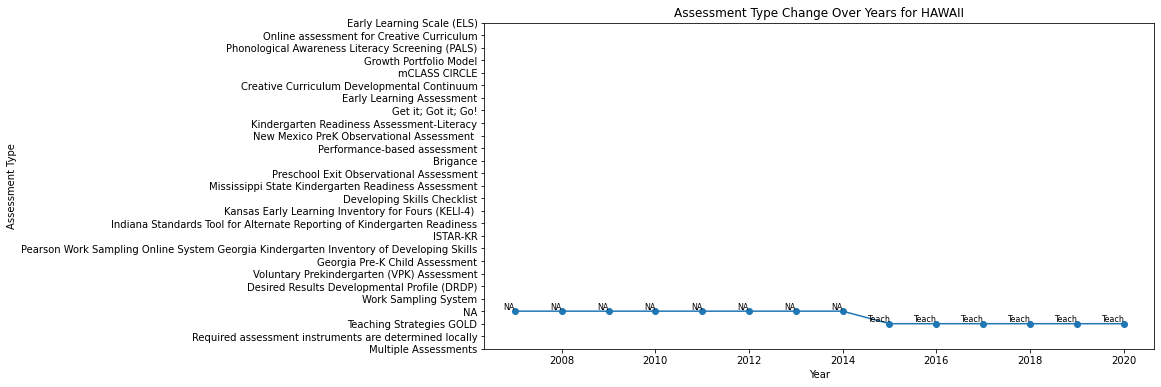

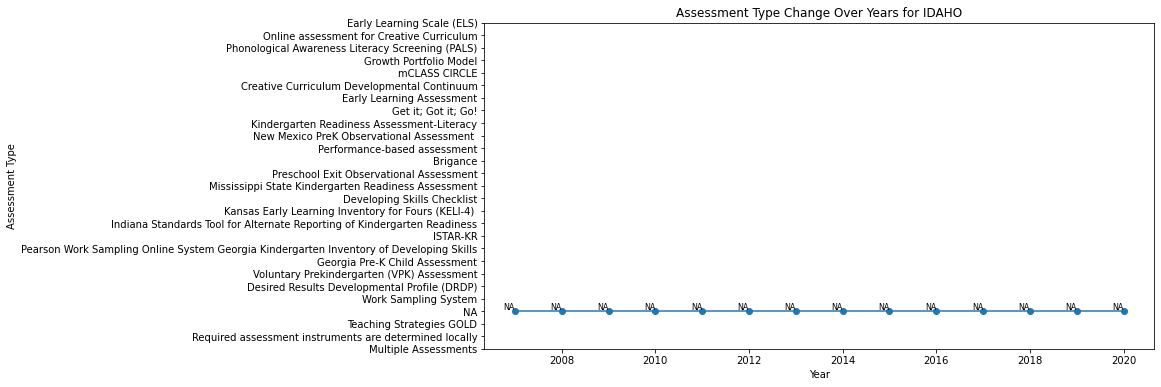

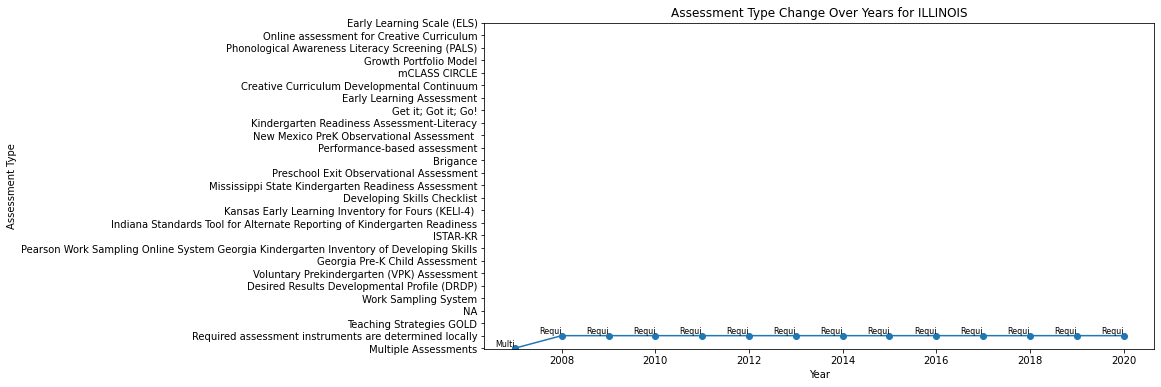

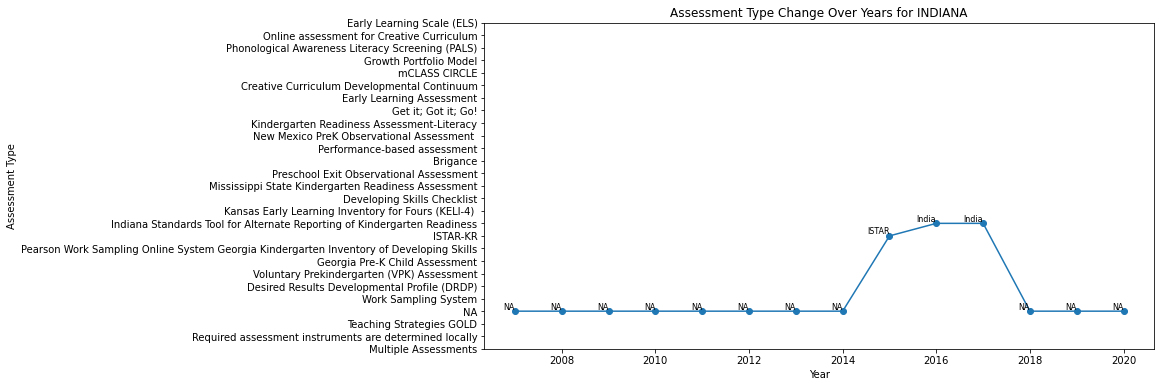

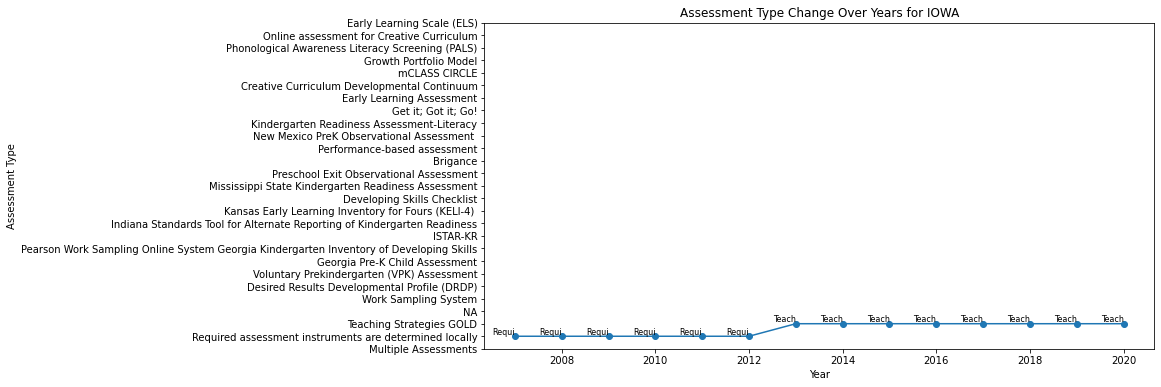

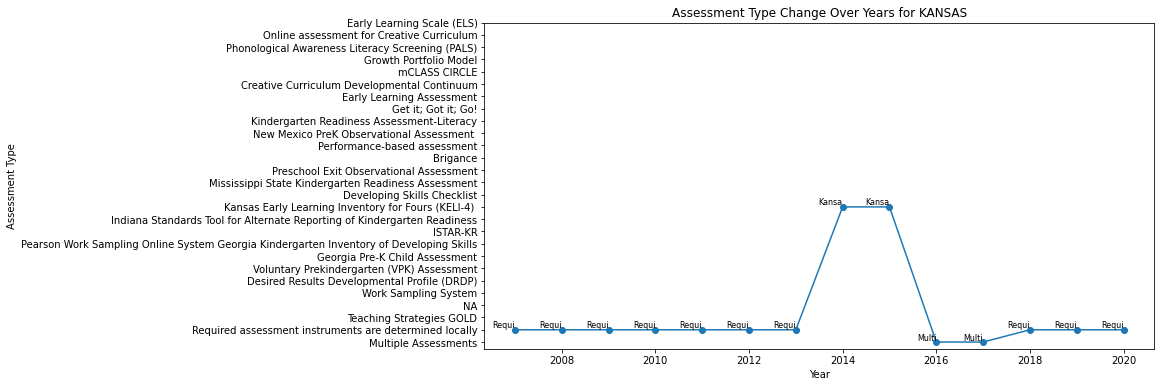

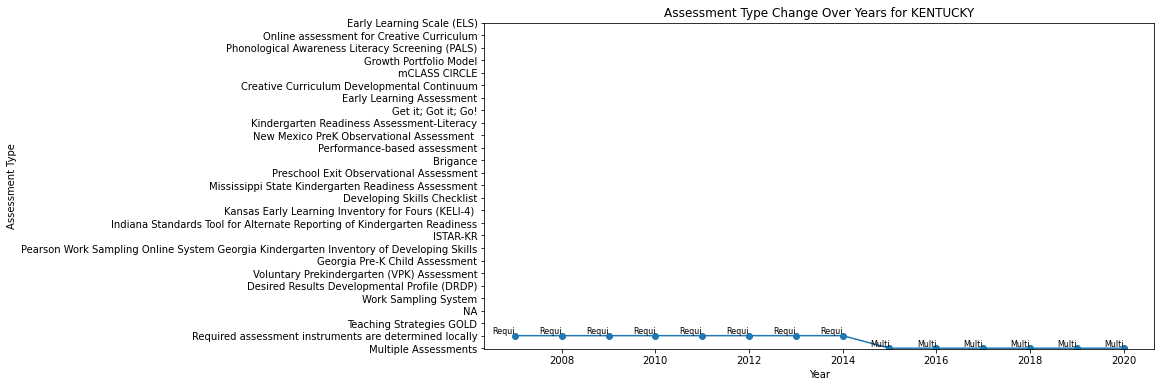

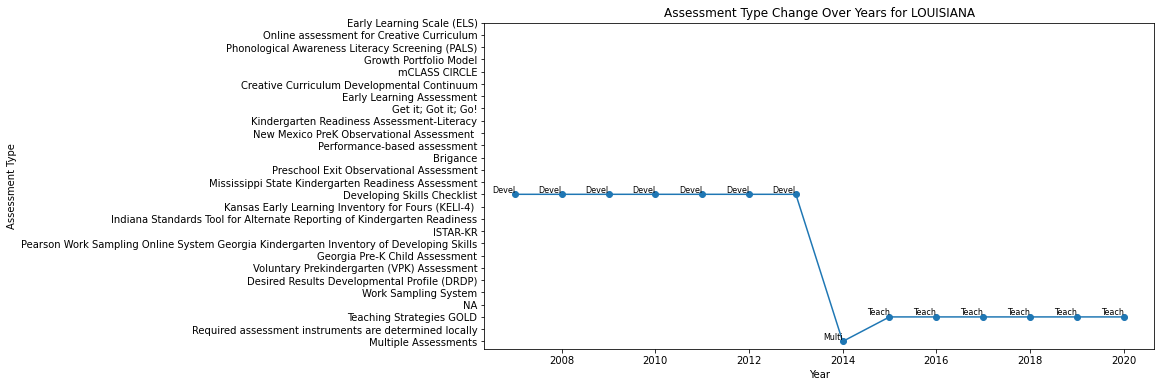

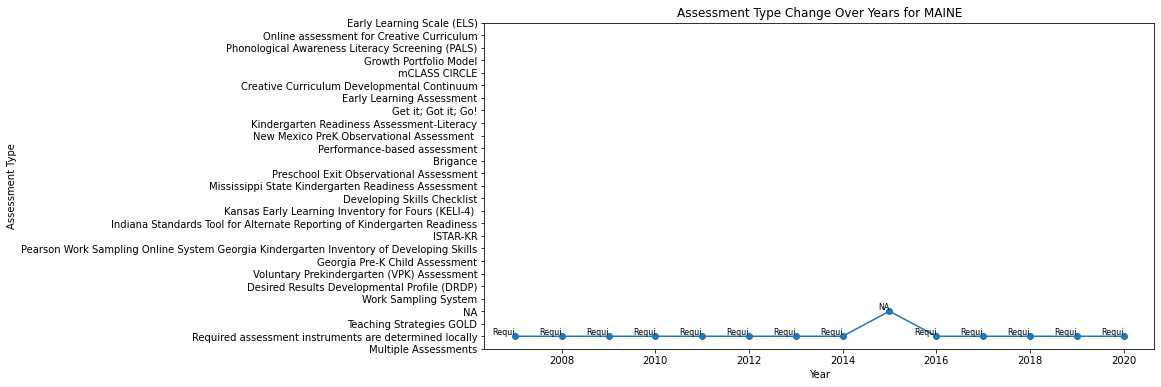

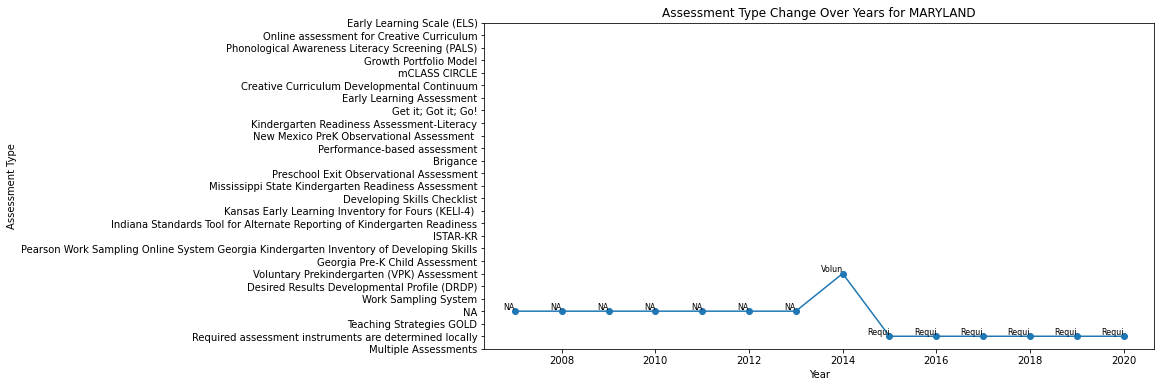

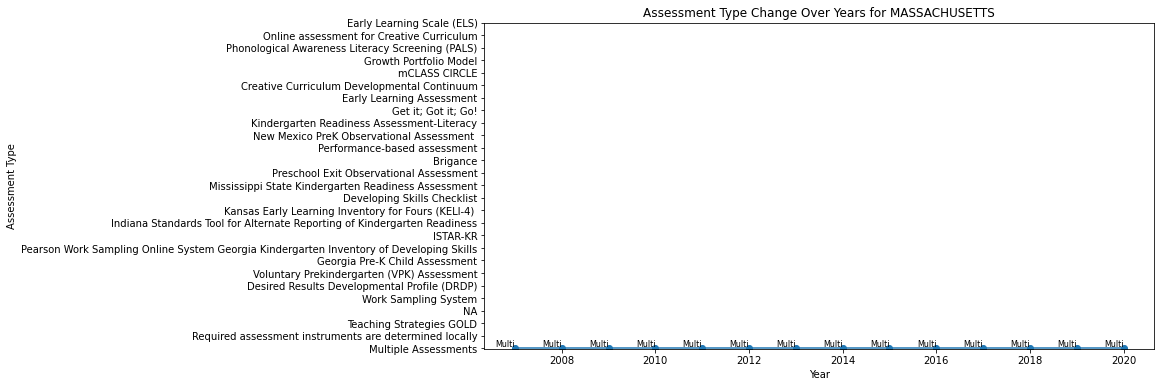

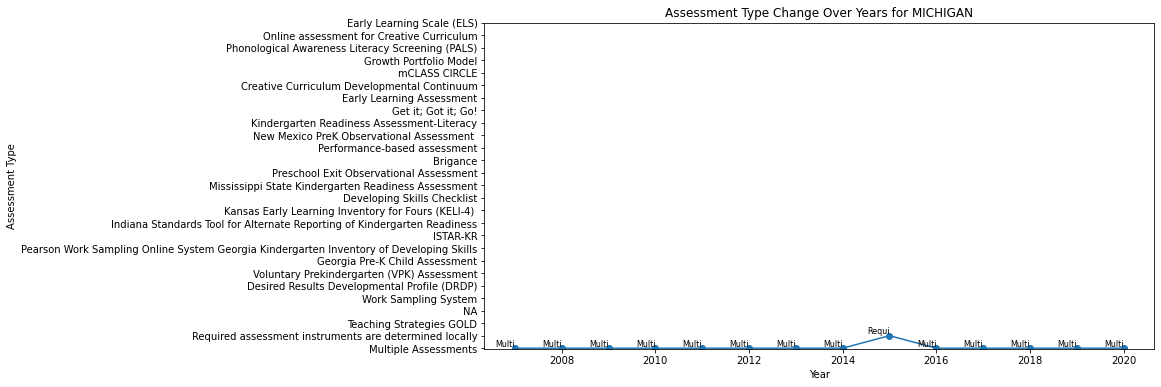

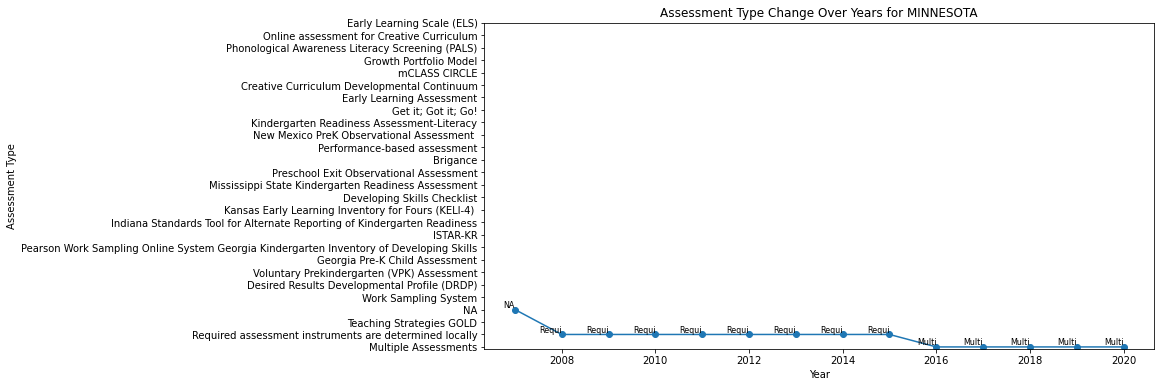

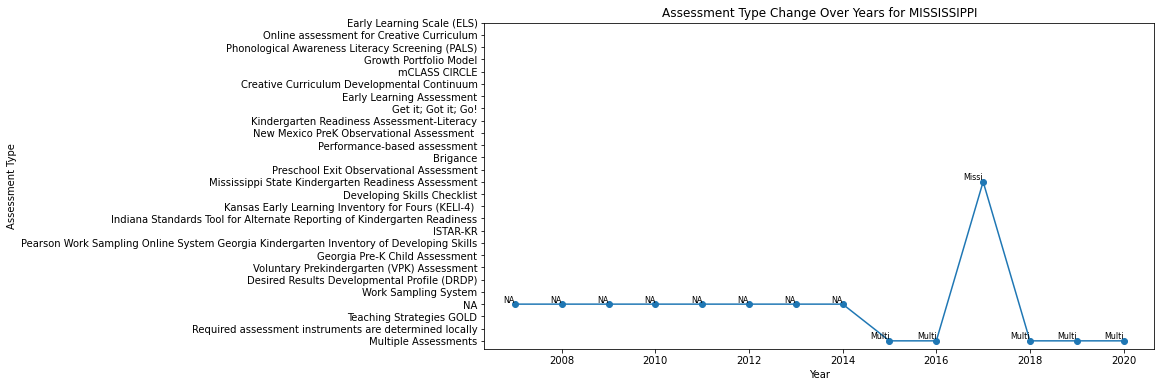

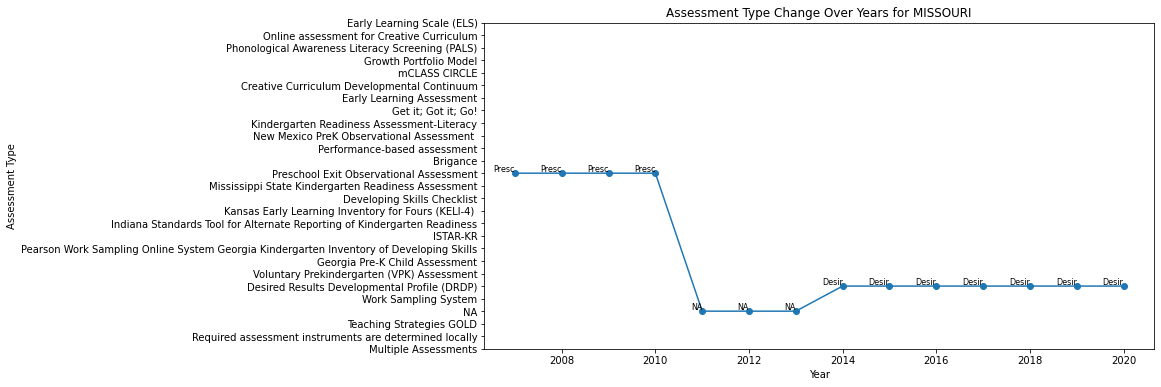

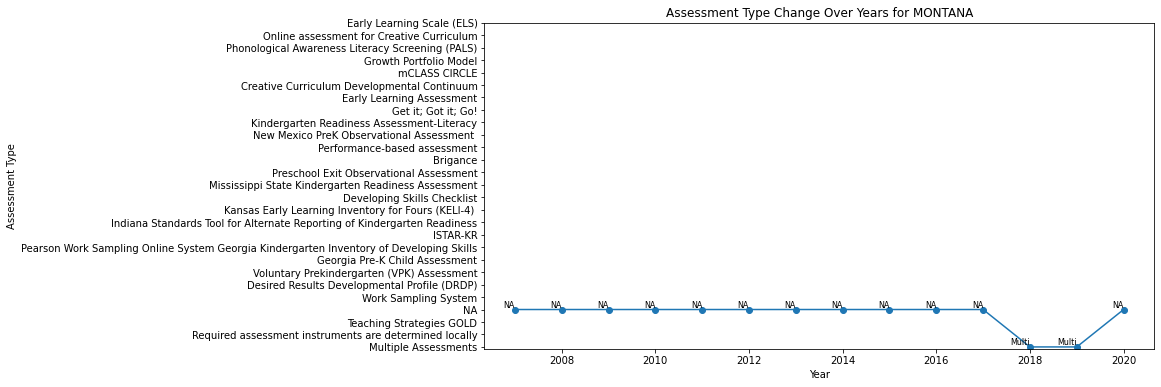

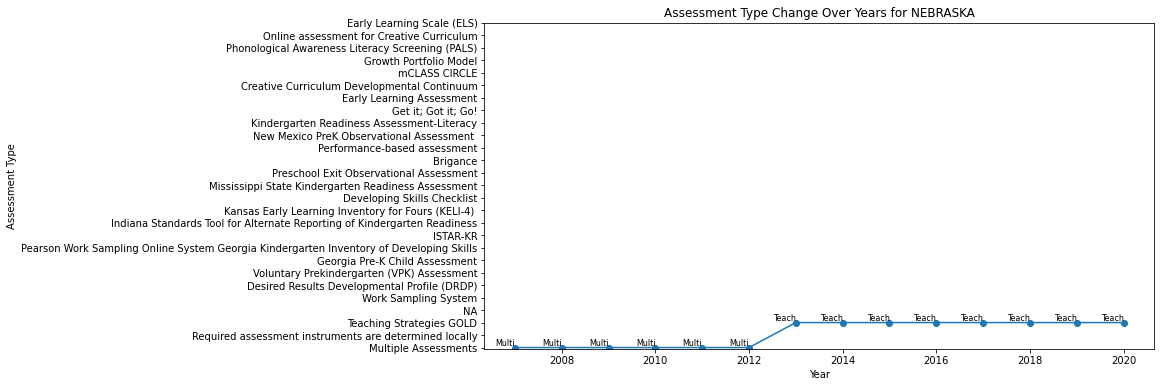

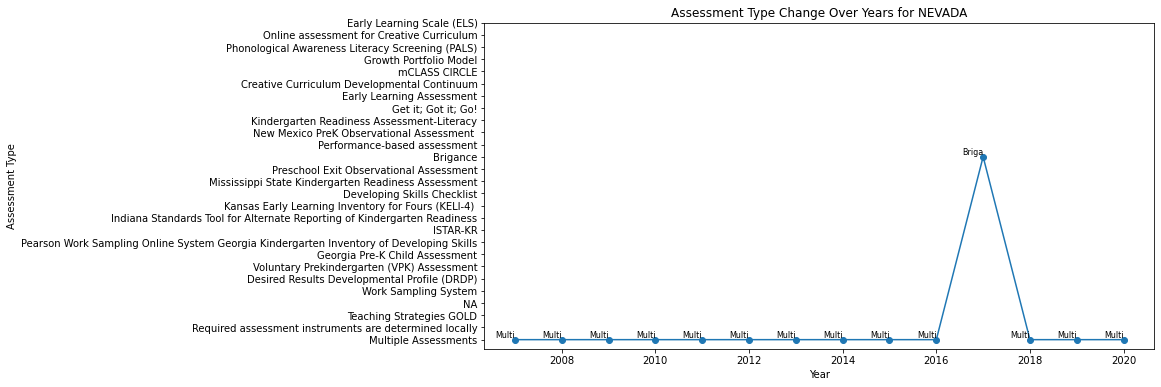

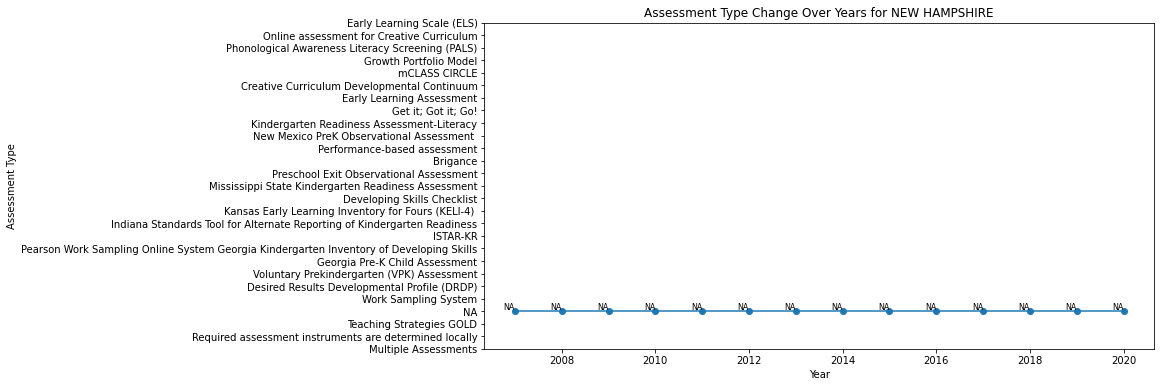

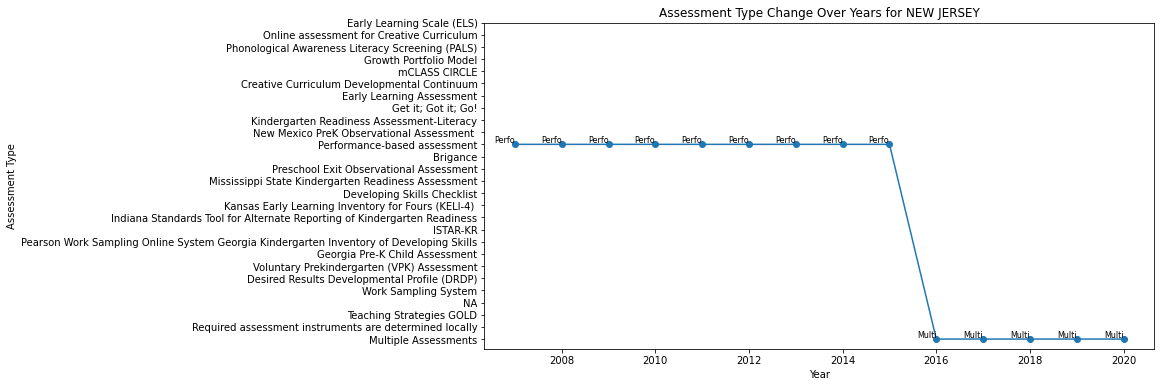

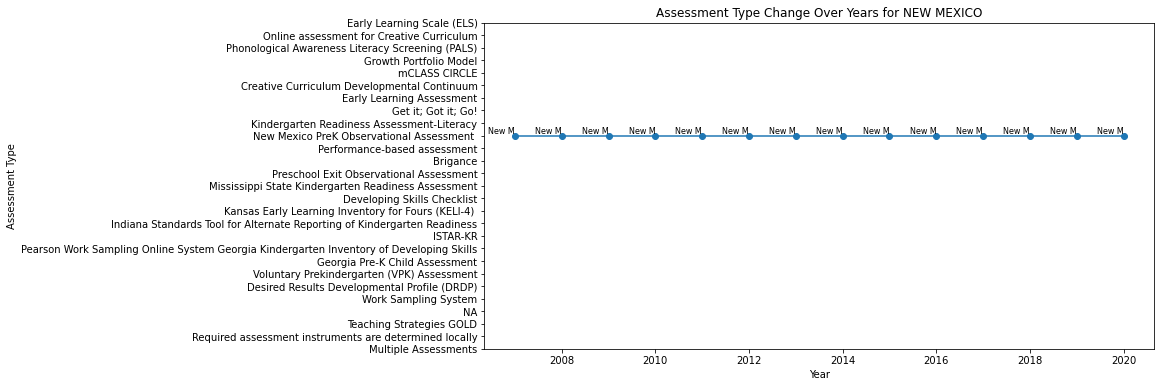

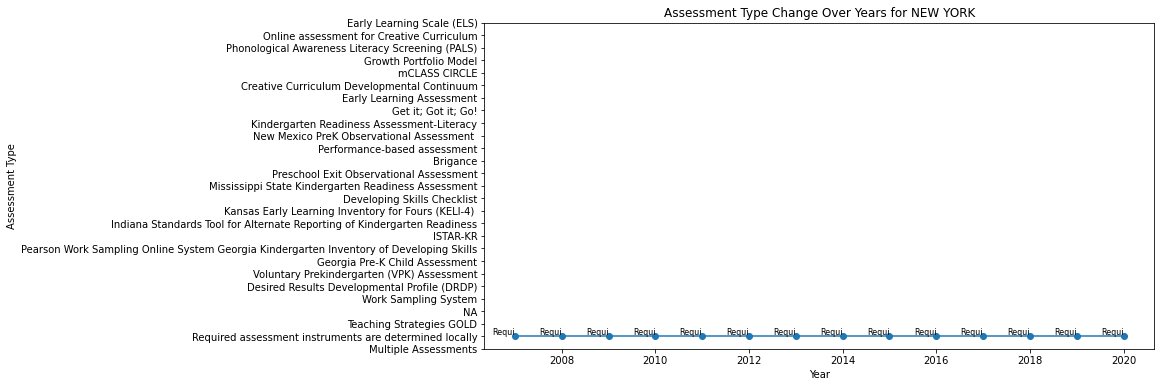

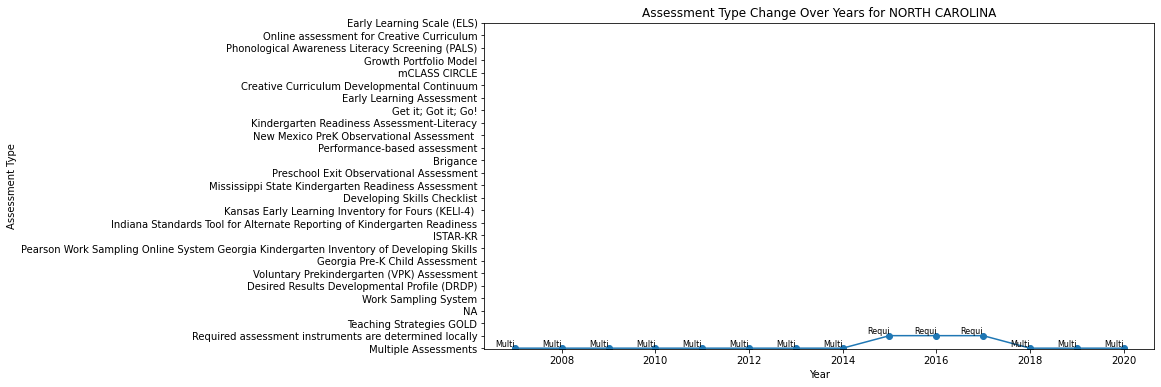

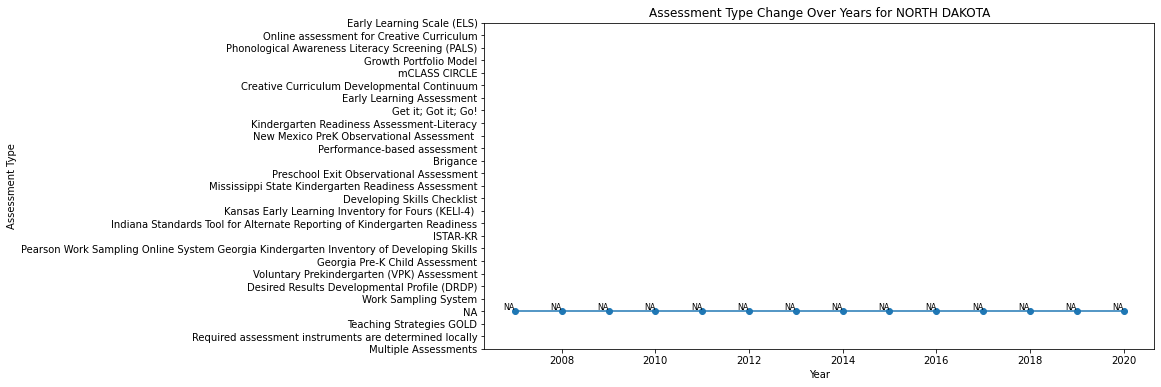

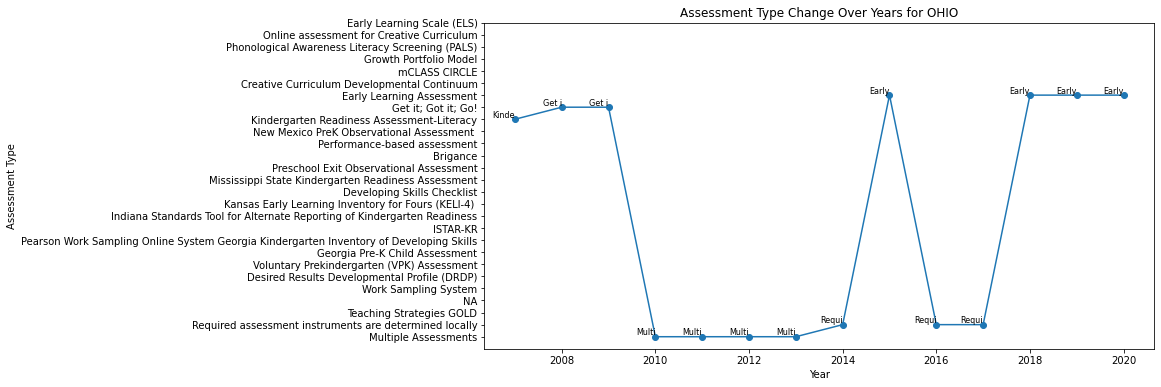

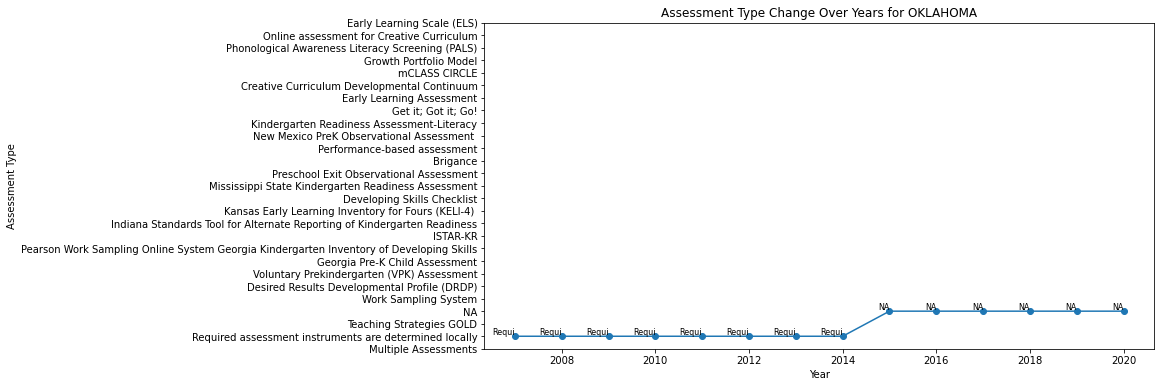

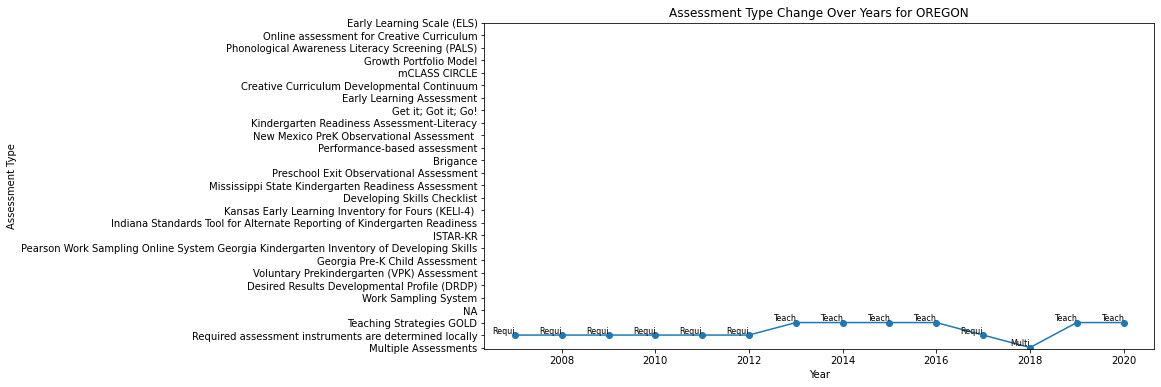

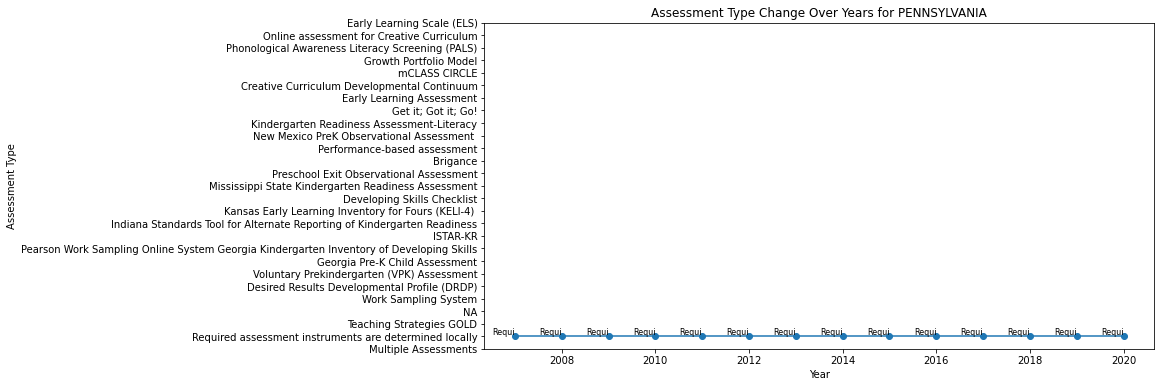

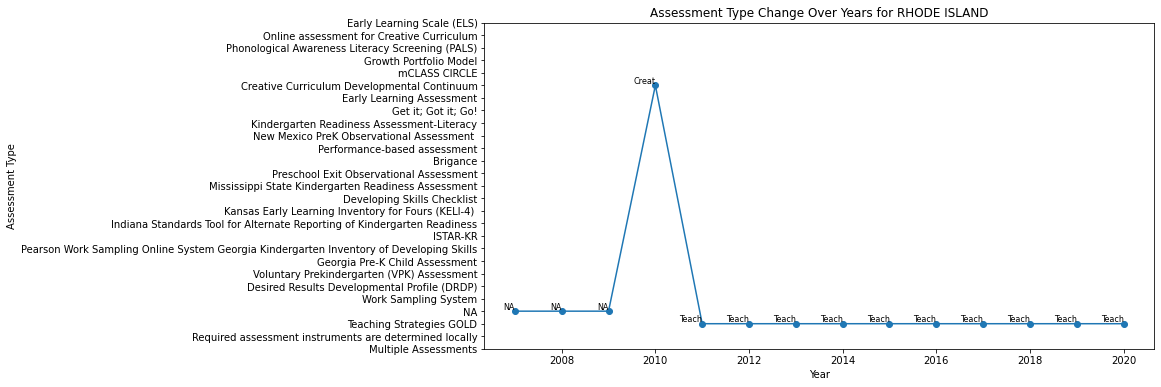

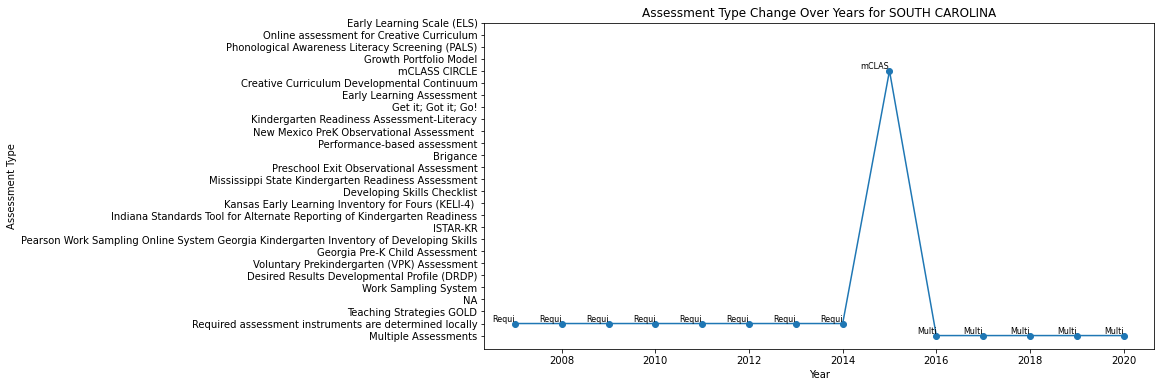

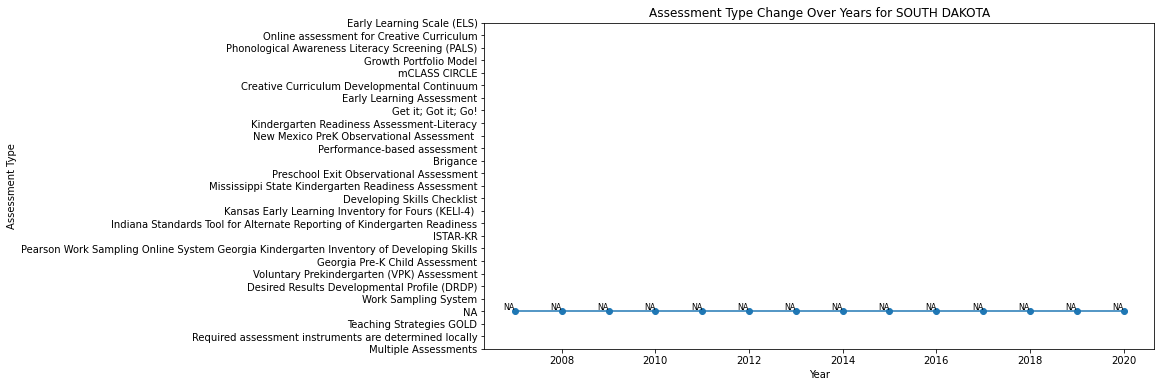

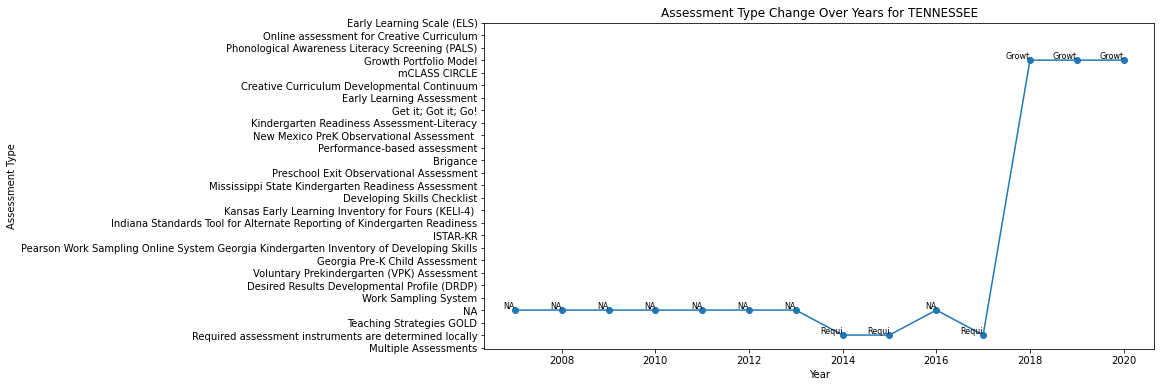

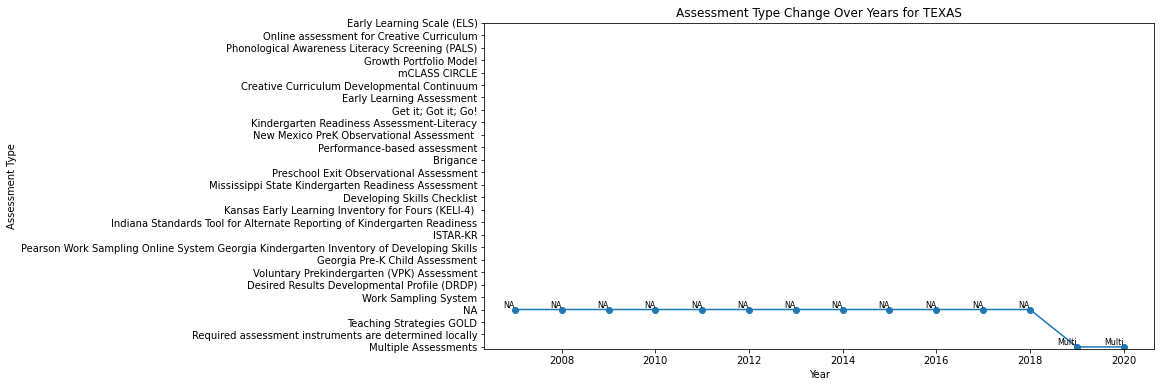

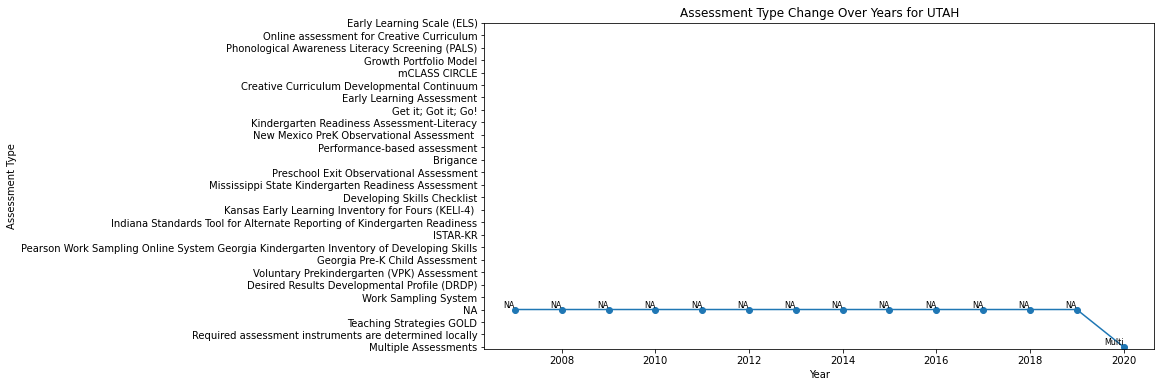

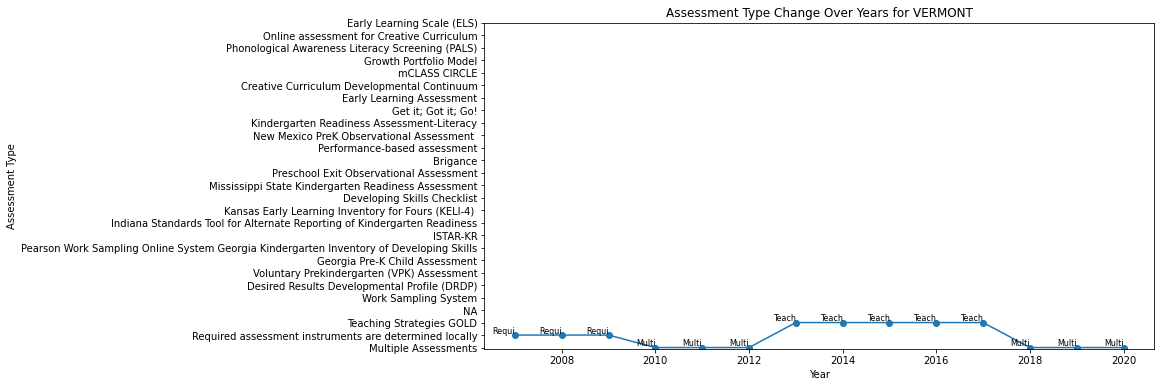

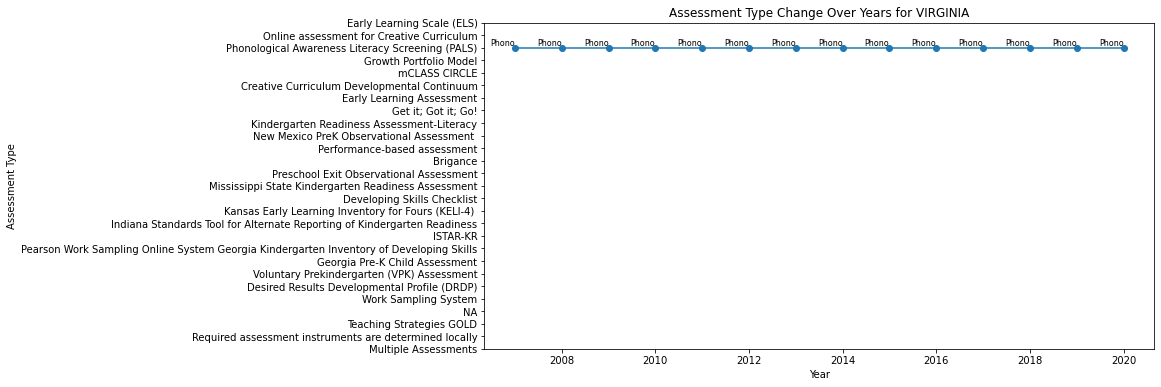

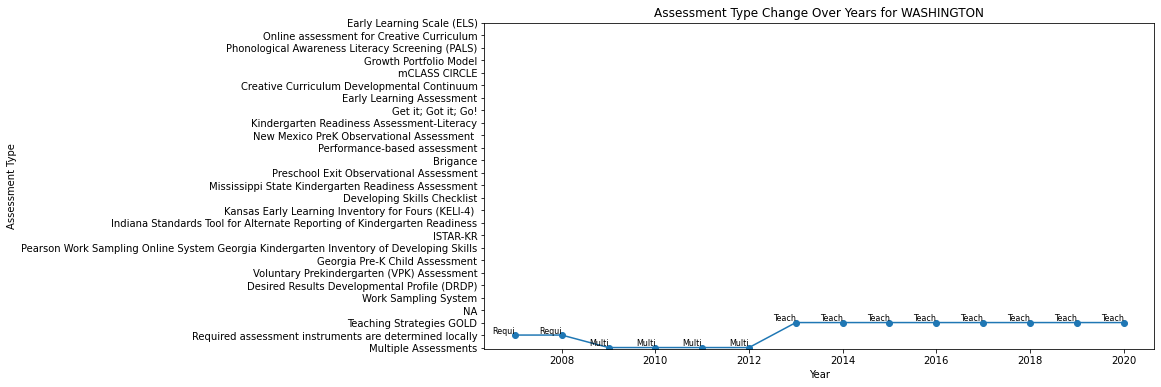

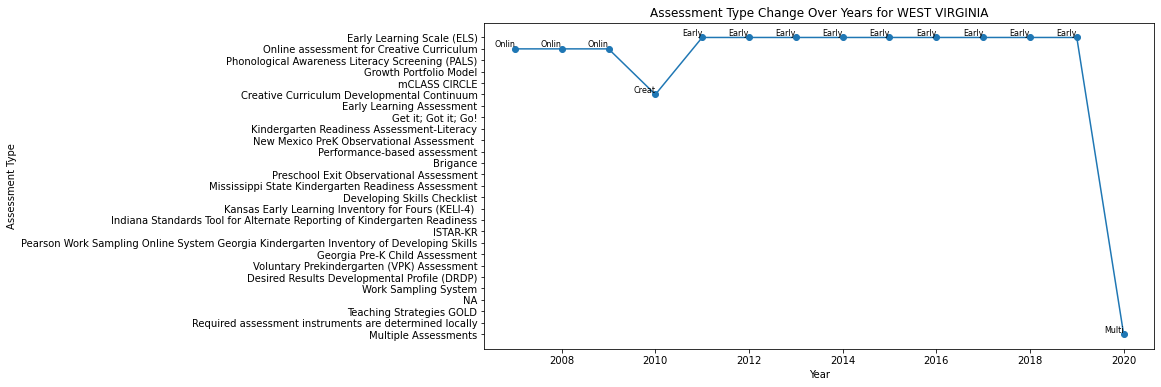

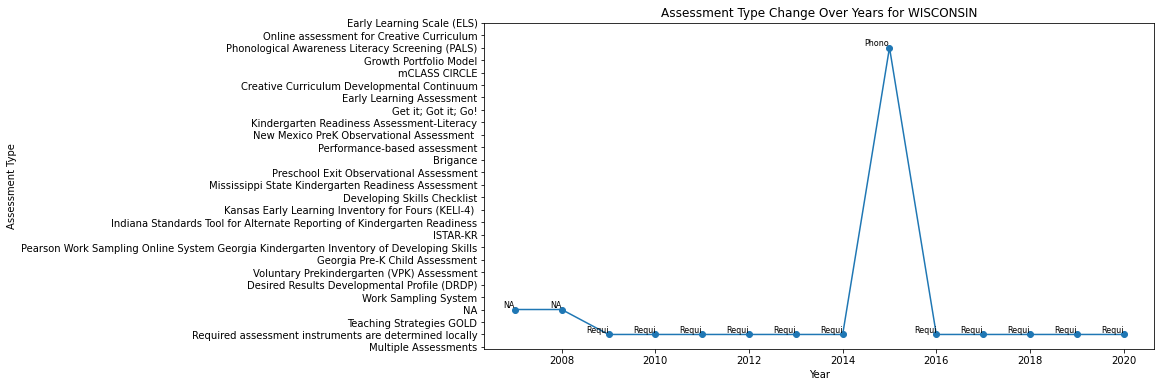

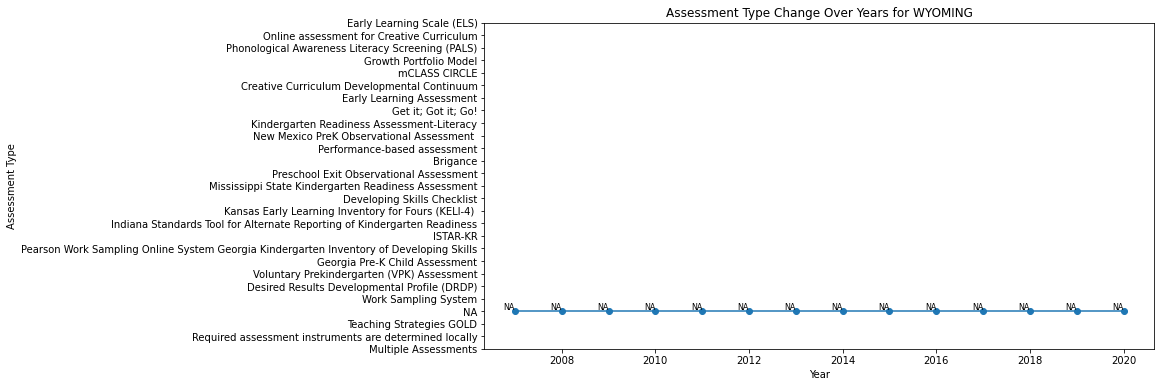

In [23]:
# State analysis
# Assessment per year for each State from 2007 to 2020 (line graphs)
# Map categories to numbers
assessment_types = geo_gdf["RequiredAssessmentforpreK"].unique()
type_to_num = {t: i for i, t in enumerate(assessment_types)}


# Apply the mapping
geo_gdf["type_num"] = geo_gdf["RequiredAssessmentforpreK"].map(type_to_num)

# Plotting
states = geo_gdf["State"].unique()
for state in states:
    state_data = geo_gdf[geo_gdf["State"] == state].sort_values("Year")

    plt.figure(figsize=(12, 6))
    plt.plot(state_data["Year"], state_data["type_num"], marker="o")

    # Add shortened labels for each point
    for x, y, label in zip(
        state_data["Year"],
        state_data["type_num"],
        state_data["RequiredAssessmentforpreK"],
    ):
        plt.text(
            x, y, label[:5], fontsize=8, ha="right", va="bottom"
        )  # Only the first 5 characters of the label

    plt.title(f"Assessment Type Change Over Years for {state}")
    plt.xlabel("Year")
    plt.ylabel("Assessment Type")
    plt.yticks(range(len(assessment_types)), assessment_types)

    plt.show()

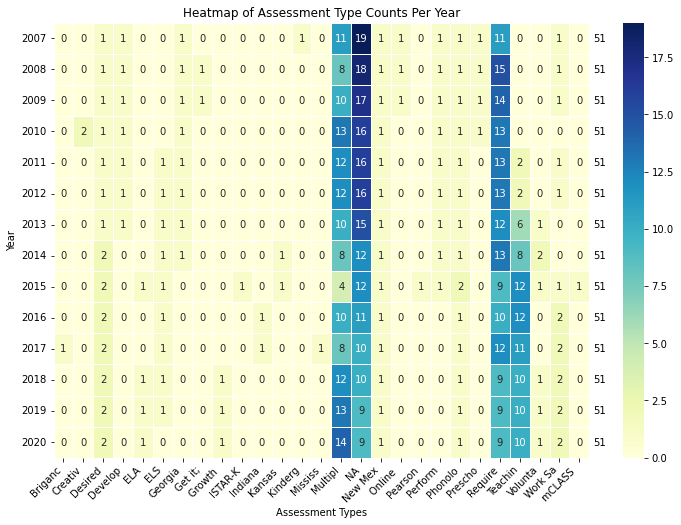

In [62]:
import seaborn as sns
import numpy as np

# Assessment Analysis
# Group and count data
assessment_counts = (
    geo_gdf.groupby(["Year", "RequiredAssessmentforpreK"]).size().unstack(fill_value=0)
)
# Calculating the total number of assessments each year
total_assessments_per_year = assessment_counts.sum(axis=1)

plt.figure(figsize=(12, 8))
sns.heatmap(assessment_counts, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)

# Modifying x-axis labels
shortened_labels = []
for label in assessment_counts.columns:
    if label == "Early Learning Scale (ELS)":
        shortened_labels.append("ELS")
    elif label == "Early Learning Assessment":
        shortened_labels.append("ELA")
    else:
        shortened_labels.append(label[:7])

midpoint = np.arange(len(assessment_counts.columns)) + 0.5
plt.xticks(ticks=midpoint, labels=shortened_labels, rotation=45, ha="right")

plt.yticks(rotation=0)

# Adding titles and labels
plt.title("Heatmap of Assessment Type Counts Per Year")
plt.xlabel("Assessment Types")
plt.ylabel("Year")

# Adding total assessments per year on the right edge of the heatmap
for i, total in enumerate(total_assessments_per_year):
    plt.text(
        len(assessment_counts.columns) + 0.5, i + 0.5, total, va="center", ha="center"
    )

plt.show()